In [2]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import statsmodels.api as stm
import math
from salem import *
import pwlf
from hydroeval import *
import xarray as xr
from sklearn.metrics import mean_squared_error as MSE
import fiona, rasterio
import geopandas as gpd
from rasterio.plot import show
import rasterio.plot as rplt
from rasterio.features import rasterize
from rasterstats import zonal_stats
import pickle
import warnings
warnings.filterwarnings("ignore")

def cm2inch(*tupl):  ### plots in cm ##frontiers 180 mm for full width, 85 mm half width (1 column) figures
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
years = [2016, 2017, 2018]

sVSTAKE=1.10; sVOFFice=1.1; sVCoreg=2.0; sVRAND=1.5
sVsys=np.sqrt((sVOFFice**2)+(sVCoreg)**2)
sVZ=np.sqrt((sVsys**2)+((sVRAND)**2))
sVZ

2.7313000567495327

In [142]:
# df_agg.gpr[df_agg.distance==0.0]=0.0;df_agg.gpr[(df_agg.distance==df_agg.len)]=0.0;
# df_agg.gpr[(df_agg.id==2)&(df_agg.distance==0.0)]=12.5;df_agg.gpr[(df_agg.id==3)&(df_agg.distance==0.0)]=42.2;
# df_agg.H_opt[(df_agg.gpr==0.0)&(df_agg.distance==0.0)]=0.0;df_agg.H_opt[(df_agg.distance==df_agg.len)]=0.0;
# df_agg.farin_corr[(df_agg.gpr==0.0)&(df_agg.distance==0.0)]=0.0;df_agg.farin_corr[(df_agg.distance==df_agg.len)]=0.0;


# d=df_agg[(df_agg.id==0)];dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y,4); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# # for f in range(len(dist)):
# #     df_agg.gpr[(df_agg.id==4)&(df_agg.distance==dist[f])]=fill[f]

# # d=df_agg[(df_agg.id==4)&(df_agg.distance<300)];dist=d.distance[np.isnan(d.gpr)].values;
# # x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# # coefficients = np.polyfit(x, y,3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# # new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# # # for f in range(len(dist)):
# # #     df_agg.gpr[(df_agg.id==4)&(df_agg.distance==dist[f])]=fill[f]

# # d=df_agg[(df_agg.id==4)&(df_agg.distance>300)&(df_agg.distance<830)];dist=d.distance[np.isnan(d.gpr)].values;
# # x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# # coefficients = np.polyfit(x, y,6); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# # new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# # # for f in range(len(dist)):
# # #     df_agg.gpr[(df_agg.id==4)&(df_agg.distance==dist[f])]=fill[f]

In [143]:
# D.gpr[D.distance==0.0]=0.0;D.gpr[(D.distance==D.len)]=0.0;
# D.gpr[(D.id==2)&(D.distance==0.0)]=12.5;D.gpr[(D.id==3)&(D.distance==0.0)]=42.2;
# D.H_opt[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.H_opt[(D.distance==D.len)]=0.0;
# D.farin_corr[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.farin_corr[(D.distance==D.len)]=0.0;

# d=D[(D.id==1)&(D.distance<650)];dist=d.distance[np.isnan(d.gpr)].values; 
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]

# d=D[(D.id==1)&(D.distance>650)];dist=d.distance[np.isnan(d.gpr)].values; 
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]
    
# d=D[(D.id==2)&(D.distance<750)]
# dist=d.distance[np.isnan(d.gpr)].values; 
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

# d=D[(D.id==2)&(D.distance>700)&(D.distance<1000)]
# dist=d.distance[np.isnan(d.gpr)].values; 
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

# d=D[(D.id==2)&(D.distance>1300)]
# dist=d.distance[np.isnan(d.gpr)].values; 
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 7); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]
    
# d=D[(D.id==3)&(D.distance>500)&(D.distance<1400)]
# dist=d.distance[np.isnan(d.gpr)].values; 
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 4); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==3)&(D.distance==dist[f])]=fill[f]

# d=D[(D.id==3)&(D.distance>1600)];dist=d.distance[np.isnan(d.gpr)].values; 
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y, 3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==3)&(D.distance==dist[f])]=fill[f]
    
# d=D[(D.id==4)&(D.distance>830)];dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y,4); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

# d=D[(D.id==4)&(D.distance<300)];dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y,3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

# d=D[(D.id==4)&(D.distance>300)&(D.distance<830)];dist=d.distance[np.isnan(d.gpr)].values;
# x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
# coefficients = np.polyfit(x, y,6); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
# for f in range(len(dist)):
#     D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

In [144]:
# ##plot velocity cross sections
# for i in range(D.id.nunique()):
#     d=D[(D.id==i)]#&(D.distance<300)]
#     dist=d.distance[np.isnan(d.vz)].values;
# #     if len(dist) > 0:
#     x=d.distance[np.logical_not(np.isnan(d.vz))].values;y=d.vz.values; y=y[np.logical_not(np.isnan(y))]
# #     coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
# #     new_y = poly(new_x);fill=poly(dist);plt.scatter(dist,fill,color='r');

#     plt.plot(x, y, "o", label=i)
# plt.legend()
# #         for f in range(len(dist)):
# #             D.vz[(D.id==i)&(D.distance==dist[f])]=fill[f] 

In [145]:
# obs = pd.read_csv(fl_path+ 'Kokanee_bdot.csv') 
# obs = obs[(obs.Year>2015)&(obs.Year<2019)&(np.logical_not(np.isnan(obs.Ba)))]#  obs.Ba_survey!=np.nan)]
# len(obs)/3

Mean Vel. vz 4.79 2.7
4.7920294
2.6967874
Original vector layer projection:  epsg:2955
New vector layer projection (PROJ4):  epsg:2955


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
Original vector layer projection:  epsg:2955
New vector layer projection (PROJ4):  epsg:2955


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
slope RLM: 0.00844987158924337
slope RLM: 0.006564211936734848
slope RLM: 0.0064521010261115765
slope RLM: 0.00621768475069822
0.6516526526377775
0.6353111497261876
0.5280630813133635
Mean Vel. vz 4.79 2.97
4.7934384
2.971611
Original vector layer projection:  epsg:2955
New vector layer projection (PROJ4):  epsg:2955


(0, 'min')
(1, 'max')
(2, 'mean')
(3, 'count')
(4, 'sum')
(5, 'std')
(6, 'median')
(7, 'majority')
(8, 'minority')
(9, 'unique')
(10, 'range')
Original vector la

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


slope RLM: 0.008208191771213591
slope RLM: 0.006837256634081333
slope RLM: 0.0066284742799622804
slope RLM: 0.005862020162383242
0.6733891177987641
0.6731461040177978
0.5565988280985079


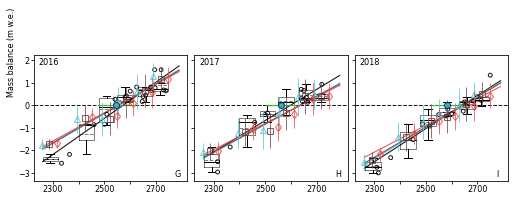

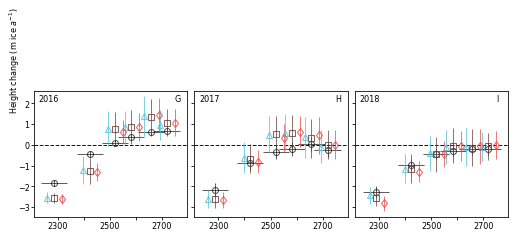

In [3]:
font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
mfc='none'; mew=1.1; elw=0.9
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.'; pylab.rcParams['ytick.major.pad']='1.'

fig1, ax1 = plt.subplots(1,3, sharex=True, sharey=True, figsize=(cm2inch(18, 5))) #obs. and flux gate SMB boxplot/errorbar plot
fig2, ax2 = plt.subplots(1,3, sharex=True, sharey=True, figsize=(cm2inch(18, 5))) ##mass conservation plot

count = 0

for yr in range(len(years)):
    # season
    balance = 'Ba'  # Bw or Ba (winter or annual)
    # rho_snow = 445. # 470 kg m-3 geodetic or 457 glaciological, or...take given years obs. value
    year = years[yr] # any of: 2016, 2017, 2018
    I = np.abs(year - 2016) # for selecting raster inputs

    gl = 0 # number to select glacier
    Glacier = ['Kokanee', 'Conrad']
    glacier = ['kokanee', 'conrad']
#   d = 20. # distance (meters) between flux gate points
    Dint = 0.85 #depth integrated velocity ratio, 1.0= all sliding
    sVSTAKE=1.10; sVOFFice=1.1; sVCoreg=2.0; sVRAND=1.5
    sVsys=np.sqrt((sVOFFice**2)+(sVCoreg)**2)
    sVZ=np.sqrt((sVsys**2)+((sVRAND)**2))
    
#     sVZ = 4.91  #velocity against stake measurements
#     spVZ = 0.216 
    sHopt = 0.078 ## ME:10.3 m,  MAE:0.223 (percent ratio)

    fl_path = '/home/pelto/Desktop/ice_flux/' + Glacier[gl] + '/'
    
    gpr_path = '/home/pelto/GIS/GPR/ComparisonData/'
    path = '/home/pelto/Desktop/lidar_cbt_analysis/kokanee/'
        
    VDIR = 'individual'  # 'average' or 'individual'
    firn = False
    fit = 'lin' #PW or lin
    
    if VDIR == 'individual':  
        
        vf_list = ['kokanee_vy_25m_2016.tif','kokanee_vy_25m_2017.tif','kokanee_vy_25m_2018.tif'] 
         #['img1_20160417__img1_20170521_vmap_5m_35px_spm2/', 'img1_20160417__img1_20170521_vmap_5m_35px_spm2/',
            #   'img1_20160417__img1_20170521_vmap_5m_35px_spm2/' ]#'img1_20150419__img2_20160417_vmap_5m_35px_spm2/'

        vdir = '/home/pelto/Desktop/velocity_mapping/kokanee/dem/3m/' 
        VX = vdir+ vf_list[I][:-15] + 'vx_25m_' +str(year)+ '.tif' 
        VY = vdir+ vf_list[I][:-15] + 'vy_25m_' +str(year)+ '.tif' 
        
#         VX = vdir+ vf[:-1] + '-F_vx.tif' 
#         VY = vdir+ vf[:-1] + '-F_vy.tif' 
       
    else:
        vdir = '/home/pelto/Desktop/velocity_mapping/kokanee/dem/3m/'  #'/home/pelto/Desktop/velocity_mapping/kokanee/bedem/3m/old/'
        VX = vdir + 'kokanee_all_vx_25m_blur1.tif'  #vdir+ 'kokanee_all_bedem3m_vx_5m.tif'                    #kokanee_best_dem1m_5m_vx.tif' #   #'kokanee_all_bedem3m_vx_5m.tif'
        VY = vdir + 'kokanee_all_vy_25m_blur1_nd.tif' #'/home/pelto/Desktop/velocity_mapping/kokanee/dem/kokanee_all_dem1m_5m_vy.tif' #kokanee_best_pos_dem1m_5m_vy.tif '     #'kokanee_all_bedem3m_vy_5m.tif'
        #VM = vdir+ 'kokanee_all_bedem3m_vm_5m_new.tif'     #'kokanee_all_bedem3m_vm_5m.tif'
    
    topo = '/home/pelto/Desktop/lidar_cbt_analysis/kokanee/20160913_kokanee_dem1_clip_slave.tif' 
    farinotti = gpr_path + 'RGI60-02/RGI60-02.00147_thickness.tif' #'RGI60-02.00147_thickness_srtm_corr.tif' #'RGI60-02/RGI60-02.00147'

    dhW_list = ['kokanee_2016_winter_dh_dt.tif', 'kokanee_2017_winter_dh_dt.tif', 'kokanee_2018_winter_dh_dt2.tif']
    dhA_list = ['kokanee_2016_2015_dh_dt.tif', 'kokanee_2017_2016_dh_dt_filled.tif','kokanee_2018_2017_dh_dt_21.tif', 'kokanee_2018_2015_dh_dt_21.tif']
    if balance == 'Bw':
        dh_r = path+ dhW_list[I]   #winter height change TIFF
    else:
        dh_r = path+  dhA_list[I] #Annual height change TIFF

    pts_file = fl_path + 'gis/kokanee_gates_pts_25m_wgs84.shp'  ##must be WGS84 currently
    gates = fl_path+'Kok_flux_gates_6.shp'
    shpf = path + 'Kokanee/kok_all_glaciers_2015_dem.shp'   #GLIMS_BC/glims_all/all_glaciers_2016.shp' 
#     bins=fl_path+'kokanee_flux_bins.shp'
    if year==2016:
        bins=fl_path+'kokanee_flux_bins_6.shp'
    elif year==2017:
        bins=fl_path+'kokanee_flux_6bins_16.shp'
    else: 
        bins=fl_path+'kokanee_flux_6bins_17.shp'

    obs = pd.read_csv(fl_path+ 'Kokanee_bdot.csv')
    rho = pd.read_csv(fl_path + 'RHO.csv') #'kokanee_rho_6.csv')  ## rho
    # open GeoTIFF as array
    
    vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
    vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')
    msk = salem.open_xr_dataset(path + 'kokanee_2015_extent_5m.tif')
    msk_reproj = vy.salem.transform(msk); msk = msk_reproj.to_array(name='msk')
    topo ='/home/pelto/Desktop/lidar_cbt_analysis/kokanee/20181014_Kokanee_dem1_clip_slave.tif' 

    vz = vy
    vz.data = np.sqrt(vx.data**2 + vz.data**2 )
    vz.data[vz.data<0.01]=np.nan;# vz.data[vz.data>30.0]=vz.data[vz.data>30.0]*0.5 ##remove high erroneous values
    vz.data[msk.data!=1.0] = np.nan; 
    vz=xr.DataArray(vz.data, coords=vz.coords, name='vz')
    with open(fl_path+str(year)+'_vz.pkl', 'wb') as f:
        pickle.dump(vz[0].data, f)
    
    msk_all = salem.open_xr_dataset(fl_path + 'Kokanee_all_glaciers_2015_ice_msk_5m.tif')
    gpr = salem.open_xr_dataset(fl_path + 'gpr_50_100m_5m.tif') #'gpr_outlines_all_25_25m_re5m.tif'
    farin = salem.open_xr_dataset(farinotti)

    H_opt = salem.open_xr_dataset(fl_path+ 'Kokanee_opt_thick_final.tif')#   'opt_thick251sw_MAE.tif'
    gates = salem.read_shapefile(gates)

    #reproject all images and ensure identical footprint for each 
    H_opt_reproj = vy.salem.transform(H_opt);H_opt = H_opt_reproj.to_array(name='H_opt')

    farin_reproj= vy.salem.transform(farin);farin = farin_reproj.to_array(name='farin')
    srtm_corr = fl_path + 'kokanee_SRTM_diff_29m_utm_5m.tif'
    srtm_corr = salem.open_xr_dataset(srtm_corr);srtm_corr_reproj = vy.salem.transform(srtm_corr)
    srtm_corr = srtm_corr_reproj.to_array(name='srtm_corr')
    srtm_corr.data[srtm_corr.data>10.0] = 0.0  ##remove positive anomalous values
    farin_corr = farin + srtm_corr
    farin_corr= farin_corr.rename('farin_corr')
    gpr_reproj = vy.salem.transform(gpr);gpr = gpr_reproj.to_array(name='gpr')

    gpr.data[gpr.data<0.5] = np.nan
#     vy.data[vy.data<0.0] = np.nan ## remove false velocity vectors (up glacier velocity)
#     VZ = np.sqrt(vx.data**2 + vy.data**2 )
    
    VZ_off_ice = vz.copy()
#     VZ[msk.data<1.0] = np.nan;VZ[VZ==0.0]=np.nan; VZ[VZ<0.1]=np.nan;
#     VZ_off_ice[msk.data>0.0] = np.nan
#     VZ_off_ice[VZ_off_ice==0.0] = np.nan

    dem = salem.open_xr_dataset(topo)
    dem_reproj = vy.salem.transform(dem)
    dem = dem_reproj.to_array(name='dem')
    dem.data[dem.data<1] = np.nan

    #     # map extent
    # grid = mercator_grid(center_ll=(-117.43, 51.238), extent=(4500, 4500)) ##zoomed out view
    # 487892.000 5509738.000 491232.000 5512358.000
    grid = vy.salem.grid  ##full view
    sm = Map(grid, countries=False)
    sm.set_lonlat_contours(interval=0)
    sm.set_scale_bar()
    sm.set_data(vz) #, label='m')
    #      Change the lon-lat countour setting
    sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
    off_ice_V = np.nanmean(VZ_off_ice)
    print('Mean Vel. vz', round(np.nanmean(vz),2), round(np.nanstd(vz),2))
    print(off_ice_V)
    print(np.nanstd(VZ_off_ice))
    gdf = salem.read_shapefile(shpf)
    sm.set_shapefile(gdf, linewidth=1)
    sm.set_shapefile(gates, linewidth=1.5, color='r')
#     sm.visualize()
#     plt.savefig(fl_path+ 'products/'+ glacier[gl] +str(year) +'ice_vel_gates.png', dpi=300)
#     plt.show()

    ## Functions for calculating zonal statistics over each flux gate bin

    # https://community.esri.com/groups/python-snippets/blog/2019/05/07/calculating-zonal-statistics-with-python-rasterstats
    # For loading shapefiles into geopandas dataframe

    def enum_items(source):
        print("\n")
        for ele in enumerate(source): 
            print(ele)

    def list_columns(df):
        field_list = list(df)
#         enum_items(field_list)
        return field_list

    def loadshp_as_gpd(shp):
        data_shp = gpd.read_file(shp)
        return data_shp

    # For loading feature classes into geopandas dataframe
    def loadfc_as_gpd(fgdb):
        layers = fiona.listlayers(fgdb)
        enum_items(layers)
        index = int(input("Which index to load? "))
        fcgpd = gpd.read_file(fgdb,layer=layers[index])
        return fcgpd

    # For re-projecting input vector layer to raster projection
    def reproject(fcgpd, raster):
        proj = raster.crs.to_proj4()
        print("Original vector layer projection: ", fcgpd.crs)
        reproj = fcgpd.to_crs(proj)
        print("New vector layer projection (PROJ4): ", reproj.crs)
#         fig, ax = plt.subplots(figsize=(10, 10))
#         rplt.show(raster, ax=ax)
#         reproj.plot(ax=ax, facecolor='none', edgecolor='red')
#         fig.show()
        return reproj

    def dissolve_gpd(df):
        field_list = list_columns(df)
        index = 1 #int(input("Dissolve by which field (index)? "))
        dgpd = df.dissolve(by=field_list[index])
        return dgpd

    # For selecting which raster statistics to calculate
    def stats_select():
        stats_list = stats_list = ['min', 'max', 'mean', 'count', 
                  'sum', 'std', 'median', 'majority', 
                  'minority', 'unique', 'range']
        enum_items(stats_list)
    #     indices = input("Enter raster statistics selections separated by space: ")
        indices='2 3 5 6'
        stats  = list(indices.split())
        out_stats = list()
        for i in stats:
            out_stats.append(stats_list[int(i)])
        return out_stats

    def get_zonal_stats(vector, raster, stats):
        # Run zonal statistics, store result in geopandas dataframe
        result = zonal_stats(vector, raster, stats=stats, geojson_out=True)
        geostats = gpd.GeoDataFrame.from_features(result)
        return geostats

    ###################### make an ice velocity quiver plot############################

    df = salem.read_shapefile(pts_file) 
    df_file = loadshp_as_gpd(pts_file)

    coords = np.array([p.xy for p in df.geometry]).squeeze()
    df['lon'] = coords[:, 0]
    df['lat'] = coords[:, 1]

    # ax.scatter(df.lon, df.lat, s=10, c='r' )#c='depth',cmap='viridis', s=10, ax=ax);
    xx, yy = salem.transform_proj(salem.wgs84, grid.proj, df['lon'].values, df['lat'].values)
    df['x'] = xx
    df['y'] = yy

    # shp_plt = reproject(df, VX)

    X, Y = np.meshgrid(vx.coords['x'],vx.coords['y'])
    U = vx.data[0]
    V = vy.data[0]

###########################################################################################
    vns = ['vx','vy','vz','gpr','H_opt','dem','farin_corr',]

    M = xr.merge([vx,vy,vz,gpr,H_opt,dem,farin_corr]) #dem

    for vn in vns:
        df[vn] = M[vn][0].interp(x=('z', df.x), y=('z', df.y))

    df_agg = df[['id', 'len', 'distance', 'angle', 'geometry', 'lon', 'lat']].copy()
    ii, jj = grid.transform(df['lon'], df['lat'], crs=salem.wgs84, nearest=True)
    df_agg['i'] = ii
    df_agg['j'] = jj
    # # We trick by creating an index of similar i's and j's
    # df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in (vx.coords['x'], vx.coords['y'])]
    df_agg['ij'] = ['{:04d}_{:04d}'.format(i, j) for i, j in zip(ii, jj)]
    df_agg = df_agg.groupby('ij').mean()

    # Select
    for vn in vns:
    #     M_maksed = np.ma.masked_invalid(M[vn][0])
    #     df_agg[vn] = .interp(x=('z', df_agg.i), y=('z', df_agg.j))
        df_agg[vn] = M[vn][0].isel(x=('z', df_agg.i), y=('z', df_agg.j))  

    D = df_agg[['id', 'len', 'distance', 'angle', 'lon', 'lat', 'vx', 'vy','vz' ,'gpr', 'H_opt', 'dem', 'farin_corr']].copy()

    D['vzdir'] = np.arcsin(D.vx/D.vz) *180/math.pi #degrees from north
    # fill any missing vel. direction
    for i in range(len((D))):   
        if np.isnan(D.vzdir[i])==True:
            G=D.id[i];V=np.nanmedian(D.vzdir[D.id==G]) 
            D.vzdir[i]=V
    
    ### fill in velocity nan at edges
    for i in range(D.id.nunique()):
        d=D[(D.id==i)&(D.distance<300)]
        dist=d.distance[np.isnan(d.vz)].values;
        if len(dist) > 0:
            x=d.distance[np.logical_not(np.isnan(d.vz))].values;y=d.vz.values; y=y[np.logical_not(np.isnan(y))]
            coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
            new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
            for f in range(len(dist)):
                D.vz[(D.id==i)&(D.distance==dist[f])]=fill[f] 

        d=D[(D.id==i)&(D.distance>(D.len - 300))]
        dist=d.distance[np.isnan(d.vz)].values;# print(len(dist))
        if len(dist) > 0:
            x=d.distance[np.logical_not(np.isnan(d.vz))].values;y=d.vz.values; y=y[np.logical_not(np.isnan(y))]
            coefficients = np.polyfit(x, y, 1); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
            new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
            for f in range(len(dist)):
                D.vz[(D.id==i)&(D.distance==dist[f])]=fill[f]     
    
    ### fill ice thickness gaps 
    #last and first points in each line are zero depth (except gates 2 and 3 start)
    D.distance[(D.id==0)&(D.distance==257.5)]=265
    D.gpr[D.distance==0.0]=0.0;D.gpr[(D.distance==D.len)]=0.0;
    D.gpr[(D.id==2)&(D.distance==0.0)]=12.5;D.gpr[(D.id==3)&(D.distance==0.0)]=42.2;
    D.H_opt[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.H_opt[(D.distance==D.len)]=0.0;
    D.farin_corr[(D.gpr==0.0)&(D.distance==0.0)]=0.0;D.farin_corr[(D.distance==D.len)]=0.0;
    
    
    d=D[(D.id==1)&(D.distance<650)];dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==1)&(D.distance>650)];dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==1)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==2)&(D.distance<750)]
    dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 2); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==2)&(D.distance>700)&(D.distance<1000)]
    dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==2)&(D.distance>1300)]
    dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 7); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==2)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==3)&(D.distance>500)&(D.distance<1400)]
    dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 4); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==3)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==3)&(D.distance>1600)];dist=d.distance[np.isnan(d.gpr)].values; 
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y, 3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==3)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==4)&(D.distance>830)];dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y,4); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==4)&(D.distance<300)];dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y,3); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

    d=D[(D.id==4)&(D.distance>300)&(D.distance<830)];dist=d.distance[np.isnan(d.gpr)].values;
    x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
    coefficients = np.polyfit(x, y,6); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
    new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
    for f in range(len(dist)):
        D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

    
#     D.gpr[(D.id==0)&(D.distance==262.5)]=0.0
    
#     depth=[12.5,22.7,30.95,37.2,41.4,63.2,59.6,51.5,40.4,26.0,8.5,0.0] 
#     dist=[0.,20.,50.,80.,100.,1000.,1020,1050.,1080,1110.,1140.,1153.]
#     for i in range(len(depth)):
#         D.gpr[(D.id==1)&(D.distance==dist[i])]=depth[i] 
        
#     dist=[0,20,40,60,80,100,130,160,180,210,240,260,290,320,340,360,380,400,420,440,460,480,560,590,2052]
#     depth=[50.2,50.,49.9,49.7,49.5,49.3,49.,48.7,48.5,48.1,47.7,47.5,47.1,46.6,46.3,46.0,45.7,45.4,45.,44.7,44.3,44.,42.4,41.8,0.0]
#     for i in range(len(depth)):
#         D.gpr[(D.id==2)&(D.distance==dist[i])]=depth[i]
        
#     dist=[620,640,660,680,710,740,760,790,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,1090,1120,1140,1170]
#     depth=[55.2,54.2,53.4,52.7,51.9,51.4,51.1,51.0,51.1,51.4,51.7,52.2,52.8,53.5,54.3,55.2,56.3,57.5,58.7,60.1,61.6,64.1,66.9,68.9,72.0]
    
#     for i in range(len(depth)):
#         D.gpr[(D.id==3)&(D.distance==dist[i])]=depth[i]
        
#     dist=[880,990,1020,1040,1060,1080,1100,1120,1150,1180,1200,1230,1260,1290,1320,1340,1370,1400,1420,1440,1460,1480,1500,1530,1560,1590,1620,1700.0,1720,1740,1760,1780,1800,1820]
#     depth=[25.76923,39.53941,42.68357,44.63413,46.46823,48.2,49.8,51.27188,53.2807,55.02751,56.0465,57.35665,58.40479,59.19093,59.71506,59.91893,60.0064,59.83186,59.56995,59.19159,58.69678,58.08553,57.35783,56.04795,54.47607,52.64218,50.54629,37.43474,33.35523,29.06548,24.56549,19.85525,14.93477,9.804047]
#     for i in range(len(depth)):
#         D.gpr[(D.id==4)&(D.distance==dist[i])]=depth[i] 
    
#     d=D[(D.id==4)&(D.distance>800)];dist=d.distance[np.isnan(d.gpr)].values;
#     x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
#     coefficients = np.polyfit(x, y,5); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
#     new_y = poly(new_x);fill=poly(dist);#plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
#     for f in range(len(dist)):
#         D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]

#     d=D[(D.id==4)&(D.distance<700)];dist=d.distance[np.isnan(d.gpr)].values;
#     x=d.distance[np.logical_not(np.isnan(d.gpr))].values;y=d.gpr.values; y=y[np.logical_not(np.isnan(y))]
#     coefficients = np.polyfit(x, y,7); poly = np.poly1d(coefficients); new_x = np.linspace(x[0], x[-1]);
#     new_y = poly(new_x);fill=poly(dist)#;plt.scatter(dist,fill,color='r');plt.plot(x, y, "o", new_x, new_y)
#     for f in range(len(dist)):
#         D.gpr[(D.id==4)&(D.distance==dist[f])]=fill[f]
    
    ############ correct ice thickness for thinning ##############  
    D1=D.copy(); D1.reset_index(inplace=True,drop=True);DH=[]
    for i in range(len(D1)):
        fl_id=D1.loc[i].id
        if year == 2016:
            del_h=0.0 ## no change 2017 IPR maps 2016 ice surface (2016 srfc+winter SD)
        elif year == 2017:
            del_h=new16.loc[fl_id].dh_mean
        elif year == 2018:
            del_h=new17.loc[fl_id].dh_mean
        DH.append(del_h)

    D['DH']=DH
    D.H_opt = D.H_opt + D.DH
    D.H_opt[D.H_opt<0.] = 0.0
    D.gpr = D.gpr + D.DH 
    D.gpr[D.gpr<0.] = 0.0
    D.farin_corr = D.farin_corr + D.DH
    D.farin_corr[D.farin_corr<0.] = 0.0
    
    if year==2016: 
        with open(fl_path + glacier[0]+'_df_agg.pkl', 'wb') as f:
            pickle.dump(D, f)
    #multiply velocity vector by cosine of angle between vector and flux gate (line or line segment)
    D['vfg'] = np.abs(D.vz * np.cos((D.vzdir-(D.angle-90.))*(math.pi/180.)))  #velocity normal to gate per slice
#     for i in range(len((D))):   #D.id.nunique()):
#         if np.isnan(D.vfg[i])==True:
#             G=D.id[i]
#             V=np.nanmean(D.vfg[D.id==G]) 
#             D.vfg[i]=V     
    with open(fl_path + str(year)+'_Dvfg.pkl', 'wb') as f:
        pickle.dump(D.vfg.values, f)
    
    D.sort_values(by=['distance','id'],ascending=[True,True], inplace=True) 
    
    for n in range(D.id.nunique()):

        for c in range(len(D.id[D.id==n])): #.count()-1)#range(D.id[D.id==n].count()-1):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0:  ## first point in line
                L= D.distance[D.id==n][c+1] - D.distance[D.id==n][c]
                G= L * D.H_opt[D.id==n][c+1]*0.5;J= L * D.farin_corr[D.id==n][c+1]*0.5 #area of triangle
                 
            elif c==1: #second point from start
                L= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2
                G= L * D.H_opt[D.id==n][c]; J= L * D.farin_corr[D.id==n][c]
                 
            elif c==len(D.id[D.id==n])-2: #second to last point
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 
                G= L * D.H_opt[D.id==n]; J= L * D.farin_corr[D.id==n]
                
            elif c==len(D.id[D.id==n])-1:  #last point in line
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])
                G= L * D.H_opt[D.id==n][c-1]*0.5; J= L * D.farin_corr[D.id==n][c-1]*0.5 #area of triangle
                
            else:
                L=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))
                G=L* D.H_opt[D.id==n][c] ; J=L* D.farin_corr[D.id==n][c]  
                
            D.loc[idx,'A_Hopt']= G;D.loc[idx,'A_farin']= J; D.loc[idx,'Len_mod']= L     
    D_all=D.copy() 
        
        
    D['Qopt'] = D.A_Hopt * (D.vfg) * Dint;D['Qfarin'] = D.A_farin * (D.vfg) * Dint 

    ### Uncertainties
    D['sQout'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*Dint) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQout_low'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*0.80) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQout_high'] = np.sqrt((sVZ * D.A_Hopt)**2 + ((D.vfg*1.00) * D.Len_mod * (sHopt*D.H_opt))**2)
    D['sQoutF'] = np.sqrt((sVZ * D.A_farin)**2 + ((D.vfg*Dint) * D.Len_mod * (sHopt*D.farin_corr))**2)

    Q_out= [0.,]; cr_area = [0.,];gate_width=[0.,];GPR=[0.,];HF=[0.,];Hopt=[0.,];
    vzdir = [0.,]; sQout= [0.,];sQout_low= [0.,];sQout_high= [0.,];vfg_all=[];gate_elev=[];v_gate_mean=[];Len_mod=[0.,]
    DV= D.copy(); DV = DV.dropna(subset=['vfg'])
    
    for n in range(D.id.nunique()):
        vfg_all.append(DV.vfg[DV.id==n])
        gate_elev.append(D.dem[D.id==n].mean())   

    for n in range(D.id.nunique()+1):
            Q_out.append(D.Qopt[D.id==n].sum()) 
            cr_area.append(D.A_Hopt[D.id==n].sum())
            vzdir.append(D.vzdir[D.id==n].mean());gate_width.append(D.len[D.id==n].max())
            sQout.append(D.sQout[D.id==n].sum());sQout_low.append(D.sQout_low[D.id==n].sum()); sQout_high.append(D.sQout_high[D.id==n].sum())  
            v_gate_mean.append(np.nanmean(D.vfg[D.id==n]));Len_mod.append(D.Len_mod[D.id==n].sum())
            GPR.append(D.gpr[D.id==n].mean());Hopt.append(D.H_opt[D.id==n].mean())
    Q_in = [Q_out[1:]]; sQin = [sQout[1:]+ [0.0]]; Q_in = np.squeeze(Q_in);sQin = np.squeeze(sQin)
    sQin_low = [sQout_low[1:]+ [0.0]];sQin_high = [sQout_high[1:]+ [0.0]]    
    sQin = np.squeeze(sQin);sQin_low = np.squeeze(sQin_low);sQin_high = np.squeeze(sQin_high)
    
    Q_outF= [0.,] #flux out per gate
    cr_areaF = [0.,]; sQoutF = [0.,]
    for n in range(D.id.nunique()+1):
            Q_outF.append(D.Qfarin[D.id==n].sum()) 
            cr_areaF.append(D.A_farin[D.id==n].sum()) 
            sQoutF.append(D.sQoutF[D.id==n].sum());HF.append(D.farin_corr[D.id==n].mean())

    Q_inF = [Q_outF[1:]] #flux in per bin
    Q_inF = np.squeeze(Q_inF)
    sQinF = [sQoutF[1:]+ [0.0]]
    sQinF = np.squeeze(sQinF)

    FG = pd.DataFrame(list(zip(Q_out, Q_in, cr_area, sQout, sQout_low, sQout_high, sQin, sQin_low, sQin_high, Q_outF, Q_inF, sQoutF, sQinF, cr_areaF, vzdir, 
           v_gate_mean, gate_width,GPR,Hopt, HF,Len_mod)), columns=['Q_out', 'Q_in', 'cr_area', 'sQout', 'sQout_low', 'sQout_high', 'sQin', 'sQin_low', 'sQin_high','Q_outF', 'Q_inF',
            'sQoutF', 'sQinF', 'cr_areaF', 'vzdir', 'v_gate_mean','gate_width','gpr','Hopt','HF','Len_mod']) 
    FG_df = FG.copy()
    dem_r = topo
    if VDIR == 'individual':
        vel_r = VX  #[:-1] + '-F_vm.tif'
    else:
        vel_r = VX[:-8] + 'm_5m.tif'
    shp = loadshp_as_gpd(bins)

    rasters = [dh_r, dem_r]#, vel_r]
    names = ['dh','dem']#,'vm']
    for i in range(len(rasters)):
        raster = rasters[i]
        rst = rasterio.open(raster)
        shp = reproject(shp, rst) #shp is in correct projection, trying anyway for calculation
        # dhdt= vx.salem.transform(dhdt)
        name = names[i]
    #     shp_vec = dissolve_gpd(shp)  ## only if more columns exist
        stats = stats_select()  #'['min', 'max', 'mean', 'count', 'sum', 'std', 'median', 'majority', 'minority', 'unique', 'range']
        ZS = (get_zonal_stats(shp, raster, stats))
        ZS.drop(['geometry'], axis=1, inplace=True)
        ZS.rename(columns={"mean": name+"_mean", "median":name+"_med","min":name+"_min","max":name+"_max","std": name+"_std", "count":name+"_count"}, inplace=True)
        ZS.sort_values(by=['bin'],ascending=True, inplace=True)
        ZS.set_index('bin', inplace=True)
        FG_df =  pd.concat([FG_df, ZS], axis=1)
    tb = 5 #top full bin
    FG_df.loc[tb, 'Q_in'] = 0.0 #FG_df.Q_out[tb+1] + FG_df.Q_out[tb+2] #flux in top full bin
    FG_df.loc[tb, 'Q_inF'] = 0.0 # FG_df.Q_outF[tb+1] + FG_df.Q_outF[tb+2] #flux in top full bin
#     FG_df.loc[tb+1, 'Q_in'] = 0.0
#     FG_df.loc[tb+1, 'Q_inF'] = 0.0
#     FG_df.loc[tb+2, 'Q_in'] = 0.0 #flux in bin 6
#     FG_df.loc[tb+2, 'Q_inF'] = 0.0 #flux in bin 6
    
    FG_df['vfg'] = FG_df.Q_out / FG_df.cr_area #net velocity per gate
    FG_df['vfg_F'] = FG_df.Q_outF / FG_df.cr_area    

    FG_df['bin']=np.arange(0,len(range(D.id.nunique()+1)),1)
    # FG_df['sQnet_opt'] = np.sqrt(FG_df.sQopt**2 + FG_df.sQin**2)

    FG_df['spQout'] = FG_df.sQout / FG_df.Q_out * 100. #%err on flux
    FG_df['spQin'] = FG_df.sQin / FG_df.Q_in * 100. #%err on flux
    FG_df['spQoutF'] = FG_df.sQoutF / FG_df.Q_outF * 100. #%err on flux
    FG_df['spQinF'] = FG_df.sQinF / FG_df.Q_inF * 100. #%err on flux

    ### import data per bin: height change, elevation, surface area, obs.SMB etc. 
    rho.sort_values(by='bin',ascending=True, inplace=True) # sort by bin
    rho.set_index('bin', inplace=True) # set bin as index for sorting
    FG_df =  pd.concat([FG_df, rho], axis=1)

    WR= np.array(FG_df.dem_count[1:])
    WR= np.append(WR,[0])

    FG_df['Q_net'] = FG_df.Q_in - FG_df.Q_out  #net flux per gate
#     FG_df.loc[4, 'Q_net'] = FG_df.Q_out[5] + FG_df.Q_out[6] - FG_df.Q_out[4] #should be covered by updated Q_in
    FG_df['Q_netA']= FG_df.Q_net / FG_df.dem_count

    FG_df['Q_netF'] = FG_df.Q_inF - FG_df.Q_outF  #net flux per gate
    FG_df['Q_netAF']= FG_df.Q_netF / FG_df.dem_count

    FG_df['area_Qin']= WR
    FG_df['sQoptA'] = FG_df.sQout / FG_df.dem_count
    FG_df['sQoptA_low'] = FG_df.sQout_low / FG_df.dem_count;FG_df['sQoptA_high'] = FG_df.sQout_high / FG_df.dem_count    
    FG_df['sQ_inA'] = FG_df.sQin / (FG_df.area_Qin+0.001)
    FG_df['sQ_inA_low'] = FG_df.sQin_low / (FG_df.area_Qin+0.001);FG_df['sQ_inA_high'] = FG_df.sQin_high / (FG_df.area_Qin+0.001)    
    FG_df['sQnetA_opt'] = np.sqrt(FG_df.sQoptA**2 + FG_df.sQ_inA**2)
    FG_df['sQnetA_opt_low'] = np.sqrt(FG_df.sQoptA_low**2 + FG_df.sQ_inA_low**2);FG_df['sQnetA_opt_high'] = np.sqrt(FG_df.sQoptA_high**2 + FG_df.sQ_inA_high**2)
    FG_df['sQoutFA'] = FG_df.sQoutF / FG_df.dem_count
    FG_df['sQ_inFA'] = FG_df.sQinF / (FG_df.area_Qin+0.001)
    FG_df['sQnetFA'] = np.sqrt(FG_df.sQoutFA**2 + FG_df.sQ_inFA**2)

    ##calculate height change due to mass balance for highest bins considering firn compaction
    if firn == False:
        FG_df.Vfirn = 0.0
    FG_df['b_fg_h'] = FG_df.dh_mean - FG_df.Q_netA + FG_df.Vfirn
    FG_df['b_fg_hF'] = FG_df.dh_mean - FG_df.Q_netAF + FG_df.Vfirn
    FG_df.column_depth = FG_df.column_depth * FG_df.firn_area ## adjust firn column height for firn area
    FG_df['RHO'] = ((FG_df.column_density * FG_df.column_depth) + (910. * (FG_df.Hopt-FG_df.column_depth)))/ FG_df.Hopt
    FG_df['RHO_F'] = ((FG_df.column_density * FG_df.column_depth) + (910. * (FG_df.HF-FG_df.column_depth)))/ FG_df.HF 
    FG_df.loc[0, 'RHO'] = 910.;FG_df.loc[0, 'RHO_F'] = 910.
    
    if balance == 'Bw':
        FG_df['b_fg_we'] = FG_df.rho_snow/1000 * FG_df.b_fg_h
        FG_df['b_fg_weF'] = FG_df.rho_snow/1000 * FG_df.b_fg_hF
    else:
        FG_df['b_fg_we'] = FG_df['RHO']/1000. * FG_df.b_fg_h           #FG_df['rho_%s'%year]/1000. * FG_df.b_fg_h
        FG_df['b_fg_weF'] = FG_df['RHO_F']/1000. * FG_df.b_fg_hF

    ### Uncertainties
    if I==0:
        sDHdt = 0.15 #NMAD coreg values            #0.04 #m Bias dh from Pelto et al. 2019
    if I==1:
        sDHdt = 0.34
    elif I==2:
        sDHdt = 0.28
    
    #sDHdt = 0.21 #    s_h_dem 0.21m,    0.04 m Bias dh from Pelto et al. 2019 
    sVfirn = 0.10
    sRHO = 0.10 # percent uncertainty in density

    FG_df['sDH_opt'] = np.sqrt(sDHdt**2 + (FG_df.sQnetA_opt)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_opt'] = np.sqrt((FG_df.sDH_opt * (FG_df['RHO']/1000.))**2+
                   (FG_df.b_fg_h * (FG_df['RHO']/1000.*sRHO))**2)

    FG_df['sDH_F'] = np.sqrt(sDHdt**2 + (FG_df.sQnetFA)**2 + (FG_df.Vfirn*sVfirn)**2)
    FG_df['sBwe_F'] = np.sqrt((FG_df.sDH_F * (FG_df['RHO_F']/1000.))**2+
                   (FG_df.b_fg_hF * (FG_df['RHO_F']/1000.*sRHO))**2)

    D['Agpr']=np.NaN
    pidx=D[(D.id==2)&(D.distance==0.0)].index ; D.loc[D.index == pidx[0],'gpr']=40.0 ## assign a value to first point on gate 2
    D = D.dropna(subset=['gpr']);D.sort_values(by=['distance','id'],ascending=[True,True], inplace=True) 
    
    for n in range(D.id.nunique()):

        for c in range(len(D.id[D.id==n])): #.count()-1)#range(D.id[D.id==n].count()-1):
            idx=D[(D.id==n)&(D.distance==D[D.id==n].distance[c])].index

            if c==0:  ## first point in line
                L= D.distance[D.id==n][c+1] - D.distance[D.id==n][c]
                G= L * D.gpr[D.id==n][c+1]*0.5;J= L * D.farin_corr[D.id==n][c+1]*0.5 #area of triangle
                 
            elif c==1: #second point from start
                L= (D.distance[D.id==n][c+1] - D.distance[D.id==n][c])/2
                G= L * D.gpr[D.id==n][c]; J= L * D.farin_corr[D.id==n][c]
                 
            elif c==len(D.id[D.id==n])-2: #second to last point
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])/2 
                G= L * D.gpr[D.id==n]; J= L * D.farin_corr[D.id==n]
                
            elif c==len(D.id[D.id==n])-1:  #last point in line
                L= (D.distance[D.id==n][c] - D.distance[D.id==n][c-1])
                G= L * D.gpr[D.id==n][c-1]*0.5; J= L * D.farin_corr[D.id==n][c-1]*0.5 #area of triangle
                
            else:
                L=(((D.distance[D.id==n][c+1]-D.distance[D.id==n][c])/2) + ((D.distance[D.id==n][c] -
                        D.distance[D.id==n][c-1])/2))
                G=L* D.gpr[D.id==n][c] ; J=L* D.farin_corr[D.id==n][c]  
                
            D.loc[idx,'Agpr']= G; D.loc[idx,'Len_gpr']= L 

    #calculate flux out using GPR thicknesses
    sGPR = 0.0516 #gpr error %
    D['sInterp_gpr'] = np.nan
    for n in range(len(D.Len_gpr)):
        if D.Len_gpr[n] > 50.:
            D.sInterp_gpr[n] = D.gpr[n] * 0.10  
        else: 
            D.sInterp_gpr[n] = 0.0
    sH_gpr = np.sqrt(D.sInterp_gpr**2+ (D.gpr*sGPR)**2)
    D['Qo_gpr'] = D.Agpr * (D.vfg) * Dint   #* 0.9 #- off_ice_V+sVZ
    D['sQo_gpr'] =  np.sqrt(((sVZ) * (D.gpr) * D.Len_gpr)**2 + ((D.vfg*Dint) * D.Len_gpr * (sH_gpr))**2)

    # D['sQo_gpr'] = np.sqrt((sVZ**2) * ((D.gpr**2 + (sH_gpr)**2) * (D.vfg*Dint)**2) * d**2)

    # D.to_csv(fl_path+'kok_16.csv') #'kokanee_gpr_fluxG_pts.csv')
    # for i in range(len(range(D.id.nunique()+1))):
    #     print(i, D.Agpr[D.id==i].mean())

    Qo_gpr = [0.,];cr_area_gpr = [0.,] ; vzdir_gpr = [0.,]; sQo_gpr= [0.,]; Len_gpr=[0.,]
    
    for n in range(D.id.nunique()):
            Qo_gpr.append(D.Qo_gpr[D.id==n].sum()) 
            cr_area_gpr.append(D.Agpr[D.id==n].sum())
            vzdir_gpr.append(D.vzdir[D.id==n].mean())
            sQo_gpr.append(D.sQo_gpr[D.id==n].sum())
            Len_gpr.append(D.Len_gpr[D.id==n].sum())
    Qin_gpr = [Qo_gpr[1:]+ [0.0]] #flux in per bin, add zero to end for top bin (for now)
    Qin_gpr = np.squeeze(Qin_gpr)
    sQin_gpr = [sQo_gpr[1:]+ [0.0]]
    sQin_gpr = np.squeeze(sQin_gpr)

    FG_gpr = pd.DataFrame(list(zip(Qo_gpr, Qin_gpr, cr_area_gpr, sQo_gpr,sQin_gpr,Len_gpr)), 
                          columns=['Qo_gpr', 'Qin_gpr', 'cr_area_gpr', 'sQo_gpr','sQin_gpr','Len_gpr']) 
    FG_gpr['bin'] = np.arange(0,len(range(D.id.nunique()+1)),1)#[0,1,2,3]
    # FG_gpr['vfg'] = FG_gpr.Qo_gpr / FG_gpr.cr_area_gpr #net velocity per gate

    FG_gpr['spQo_gpr'] = FG_gpr.sQo_gpr / FG_gpr.Qo_gpr * 100. #%err on flux
    FG_gpr['spQin_gpr'] = FG_gpr.sQin_gpr / FG_gpr.Qin_gpr * 100. #%err on flux

    FG_gpr.loc[tb, 'Qin_gpr'] = 0.0 # FG_gpr.Qo_gpr[tb+1] + FG_gpr.Qo_gpr[tb+2] #flux in bin 4
#     FG_gpr.loc[tb+1, 'Qin_gpr'] = 0.0
#     FG_gpr.loc[tb+2, 'Qin_gpr'] = 0.0

    FG_all = FG_df.merge(FG_gpr, left_index=True, right_index=True)#, how='left') #on='bin')  
    
    FG_all['Q_net_gpr'] = FG_all.Qin_gpr - FG_all.Qo_gpr 
#     FG_all.loc[4, 'Q_net_gpr'] = FG_all.Qin_gpr[5] + FG_all.Qin_gpr[6] - FG_all.Qo_gpr[4]  ##should be covered by updated Q_in
    FG_all['Q_netA_gpr']= FG_all.Q_net_gpr / FG_all.dem_count 
    FG_all['b_fg_h_gpr'] = FG_all.dh_mean - FG_all.Q_netA_gpr + FG_all.Vfirn #dh1516_mean

    FG_all['sQoutA_gpr'] = FG_all.sQo_gpr / FG_all.dem_count
    FG_all['sQ_inA_gpr'] = FG_all.sQin_gpr / (FG_all.area_Qin+0.001)
    FG_all['sQnetA_gpr'] = np.sqrt(FG_all.sQoutA_gpr**2 + FG_all.sQ_inA_gpr**2)

    FG_all['RHO_g'] = ((FG_all.column_density * FG_all.column_depth) + (910. * (FG_all.gpr-FG_all.column_depth)))/ FG_all.gpr; 
    FG_all.loc[0, 'RHO_g'] = 910.
    if balance == 'Bw':
        FG_all['b_fg_we_gpr'] = FG_df.rho_snow/1000. * FG_all.b_fg_h_gpr
    else:
        FG_all['b_fg_we_gpr'] = FG_all['RHO_g']/1000. * FG_all.b_fg_h_gpr
    
    #FG_all.loc[len(FG_gpr)-1,'b_fg_we_gpr'] = np.nan #no radar data available for flux calculation for top bin
    
    FG_all['sDH_gpr'] = np.sqrt(sDHdt**2 + (FG_all.sQnetA_gpr)**2 + (FG_all.Vfirn*sVfirn)**2)
    FG_all['sBwe_gpr'] = np.sqrt((FG_all.sDH_gpr * (FG_all['RHO_g']/1000.))**2+
                   (FG_all.b_fg_h_gpr * (FG_all['RHO_g']/1000.*sRHO))**2)

    s= 15 ;  a = 0.9; n = 0; sym = ['o', '^', 's', 'd']

    ##all_obs
    if balance == 'Bw':
        obs = obs.dropna(subset=['Bw'])
        y_ax_obs=obs[(obs.Year==year)].Bw

    else:
        obs = obs.dropna(subset=['Ba'])
        y_ax_obs=obs[(obs.Year==year)].Ba

    x_ax_obs=obs[(obs.Year==year)].Elev
    new = FG_all.copy()

    yerr = [0.0, new.sBwe_gpr , new.sBwe_opt, new.sBwe_F] #new.sBwe_gpr
    new['xerr'] = new.dem_std * 1.5 #2 std dev -- 95% of data
    xerr = new.xerr 

    x_ax_fg_gpr=new.dem_mean; y_ax_fg_gpr=new.b_fg_we_gpr
    x_ax_fg_opt=new.dem_mean; y_ax_fg_opt=new.b_fg_we; x_ax_fg_F=new.dem_mean; y_ax_fg_F=new.b_fg_weF

    x = [x_ax_obs, x_ax_fg_gpr, x_ax_fg_opt, x_ax_fg_F]
    y = [y_ax_obs, y_ax_fg_gpr, y_ax_fg_opt, y_ax_fg_F]
    
    letter=['G','H','I'] #['A','B','C']
    color = ['k', '#51c2d5','#663f3f','#ec4646'] #'teal', '#74c476', '#238b45']
    label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
    txt= ['Observed', 'FG IPR     ', 'FG OGGM   ', 'FG Farinotti']
    ##plot obs data
    ax1[count].scatter(x[0],y[0], marker='o', label=label[0], alpha=0.9, s=s,facecolors='none', edgecolors='k', zorder=3)  

    ############ obs data box plot ################
    obs_data=obs[(obs.Year==year)]
    obs_data.reset_index(inplace=True)

    bin_size = 100.
    z_range = np.arange(2350., 2850., bin_size)

    i = 0
    Z_F = []; Zor_F= []; OB_F=[]

    for z in z_range: 
        W=0;bin_size = 100.; COU=1
        while W==0:
            OBS = [];Z = [];Zor = [];
            for n in range(len(obs_data[balance])):
                if ((z - bin_size/2.) <= obs_data.Elev[n]) and (obs_data.Elev[n] <=  (z + bin_size/2.)):
                    O = obs_data[balance][n]
                    Z.append(z);Zor.append(obs_data.Elev[n]);OBS.append(O)

            if len(OBS)<2:
                bin_size=bin_size*(1+(.2*COU))
                COU=COU+1
            else:
                OB_F.append(np.array(OBS)); Z_F.append(np.array(Z));  Zor_F.append(np.array(Zor))
                W=1
        i += 1
    
    GPR = [];OPT = [];FAR = []  
    for z in z_range:
        W=0; COU=1;bin_size = 100.
        while W==0:
            GG=[];PP=[];FF=[]
            ####collect balance values for each elevation bin
            for n in range(len(new.dem_mean)): #for n in new.bin:  # 
                if ((z - bin_size/2.) <= new.dem_mean[n]) and (new.dem_mean[n] <=  (z + bin_size/2.)):
                    G = new.b_fg_we_gpr[n]
                    P = new.b_fg_we[n]
                    F = new.b_fg_weF[n]
                    GG.append(G);FF.append(F);PP.append(P)
            GG=np.array(GG)
            GG = GG[np.logical_not(np.isnan(GG))]
            
            if len(GG)<1:
                bin_size=bin_size*(1+(0.1*COU))
                COU=COU+1
                
            else:
                GPR.append(GG);OPT.append(np.array(PP));FAR.append(np.array(FF))
                W=1

    #function to create error bars for flux-derived estimates
    shift = [-30,0,30]

    for i in range(3):
        ax1[count].errorbar((x[i+1]+shift[i]), y[i+1], xerr=None, yerr=yerr[i+1], fmt=sym[i+1], ecolor=color[i+1],
                            mew=mew,label=label[i+1], elinewidth=elw,mfc=mfc, alpha=0.8, c=color[i+1], zorder=4) #elinewidth=0.7
     
    
    ###### binned observations for each flux bin ##############
    OB_FG=[];OB_FG_h=[]; new.loc[0, 'dem_std'] = new.dem_std[0]*1.5 # lowest bin std too low for method (width-limited)
    for i in range(len(new.dem_med)): 
        f = new.dem_med[i]
        W=0;bin_size = new.dem_std[i]*2; COU=1
        while W==0:
            OBSFG = []; OBSFGh=[]
            for n in range(len(obs_data[balance])):
                if ((f - bin_size) <= obs_data.Elev[n]) and (obs_data.Elev[n] <=  (f + bin_size)):
                    O = obs_data[balance][n]
                    Oh= obs_data['Ba_h'][n]
                    OBSFG.append(O);OBSFGh.append(Oh)

            if len(OBSFG)<2 and bin_size<200:
                bin_size=bin_size*(1+(.2*COU))
                COU=COU+1
            else:
                OB_FG.append(np.array(OBSFG));OB_FG_h.append(np.array(OBSFGh));
                W=1
   
    meanlineprops = dict(linestyle='--', linewidth=1., color='0.5')
    medianprops = dict(linestyle='-', linewidth=1, color='k'); boxprops = dict(linewidth=0.5);
    BOX=ax1[count].boxplot(OB_FG,meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,
            sym='', positions=new.dem_med,widths=60, zorder=1, boxprops=boxprops)

    ################# mass conservation plot ####################################
    BM= []; BMh=[]
    for i in range(len(OB_FG)):
        B = OB_FG[i].mean()
        Bh = OB_FG_h[i].mean()
        BM.append(B);BMh.append(Bh)
    new['SMB'] = BM; new['BH']= BMh
#     new['BMC'] = new.b_fg_h + new.Q_netA - new.Vfirn
#     new['BMC_gpr'] = new.b_fg_h_gpr + new.Q_netA_gpr - new.Vfirn 
#     new['BMCF'] = new.b_fg_hF + new.Q_netAF - new.Vfirn 
    new['BMC'] = new.BH  + new.Q_netA - new.Vfirn
    new['BMC_gpr'] = new.BH + new.Q_netA_gpr - new.Vfirn 
    new['BMCF'] = new.BH + new.Q_netAF - new.Vfirn 

    MC = [new.BMC_gpr,new.BMC, new.BMCF]
    Yvv = [new.Q_netA_gpr, new.Q_netA, new.Q_netAF]
    Yvv_lbl=[r'$V^{\uparrow}_{IPR}$',r'$V^{\uparrow}_{OGGM}$',r'$V^{\uparrow}_{Farin}$']
    
    yerr_dh= [new.sBwe_gpr/(new['RHO_g']/1000) , new.sBwe_opt/(new['RHO']/1000),
              new.sBwe_F/(new['RHO_F']/1000)]
    
    if I == 0:
        overlap=[];overlap_gpr=[];overlapF=[]
        MC_LIST=[overlap_gpr,overlap,overlapF]
    for i in range(3):
        if i == 0:
            ax2[count].errorbar(new.dem_mean+shift[i]+5,MC[i], xerr=None, yerr=yerr_dh[i], fmt=sym[i+1],
                            c=color[i+1], mfc=mfc,mew=mew, elinewidth=elw, label=label[i+1], alpha=0.8, zorder=2)
        else:
            ax2[count].errorbar(new.dem_mean+shift[i],MC[i], xerr=None, yerr=yerr_dh[i], fmt=sym[i+1],
                            c=color[i+1], mfc=mfc,mew=mew, elinewidth=elw, label=label[i+1], alpha=0.8, zorder=2)
    ####count the number of SMB obs. +/- 1-error which fall within the uncertainty bounds of the LiDAR height change            
        OL = MC_LIST[i] ## select which list to append to
        for r in range(len(MC[i])):
            #W=1
            M_min = MC[i][r] - yerr_dh[i][r]; M_max = MC[i][r]+ yerr_dh[i][r]
            L_min = new.dh_mean[r] - sDHdt; L_max = new.dh_mean[r] + sDHdt
            #while W==1:
            if M_min > L_min and M_min < L_max:
                OL.append(1);# W=0
            elif M_max < L_max and M_max > L_min:
                OL.append(1); #W=0
            elif M_max > L_max and M_min < L_min:
                OL.append(1); #W=0
            elif M_max < L_max and M_min > L_min:
                OL.append(1); #W=0
            else:
                OL.append(0)
    
    Ybd = [BM, new.b_fg_we_gpr, new.b_fg_we, new.b_fg_weF]
    ax1[count].tick_params(which='major', length=3);ax2[count].tick_params(which='major', length=3) 
           
#################Difference###########################################################
####initialize lists for first run
    if count == 0:
        gpr_bdiff=[];opt_bdiff=[];farin_bdiff=[];z_range_all=[];obs_all=obs_data;obs_bin_all=[];gpr_all=[];
        opt_all=[];farin_all=[];elev_all=[];elev_gpr_all=[];gpr_bin_all=[];opt_bin_all=[];farin_bin_all=[];
        NSE=[];PBias=[];RSR=[];RSQ=[];SE=[];SL=[];ME=[];MAE=[];RLM_SL=[];RLM_SE=[];MSE_ABL=[];MSE_ACC=[];
        gpr_bd_fg=[];opt_bd_fg=[];farin_bd_fg=[];obs_fg_all=[];ELA_pw=[];ELA_lin=[];SL_L=[];SE_L=[];
       
    OBF=[];GPRq=[];OPTq=[];FARq=[];OB_FGmean=[]
    ###calculate mean of balance values within each elevation bin
    for i in range(len(OB_F)):
        OBF.append(np.round(OB_F[i].mean(),3));GPRq.append(np.round(GPR[i].mean(),3))
        OPTq.append(np.round(OPT[i].mean(),3));FARq.append(np.round(FAR[i].mean(),3))
    for i in range(len(OB_FG)): ##OBS means for each FG bin
        OB_FGmean.append(np.round(OB_FG[i].mean(),3))   
    obs_fg_all.extend(OB_FGmean)
    ## do I need -1 for Kokanee??
    FG_all.dropna(subset=['b_fg_we_gpr'], inplace=True)  ## remove data for bins where GPR is nan 
    obs_bin_all.extend(OBF);gpr_bin_all.extend(GPRq);opt_bin_all.extend(OPTq);farin_bin_all.extend(FARq);
    z_range_all.extend(z_range);elev_gpr_all.extend(FG_all.dem_mean);gpr_all.extend(FG_all.b_fg_we_gpr);
    opt_all.extend(new.b_fg_we);farin_all.extend(new.b_fg_weF);elev_all.extend(new.dem_mean) 
    
    gpr_bdiff.extend((np.array(OBF) - np.array(GPRq)))
    opt_bdiff.extend((np.array(OBF) - np.array(OPTq))); farin_bdiff.extend((np.array(OBF) - np.array(FARq)))
    
    gpr_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_we_gpr)))
    opt_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_we))); farin_bd_fg.extend((np.array(OB_FGmean) - np.array(new.b_fg_weF)))
        
######################  https://pypi.org/project/hydroeval/  ##############################
    EST=[np.array(GPRq),np.array(OPTq),np.array(FARq)] ## must be arrays not lists
    OBFa=np.array(OBF);OBFGma=np.array(OB_FGmean)
    
    y_bin=[OB_FGmean,new.b_fg_we_gpr,new.b_fg_we,new.b_fg_weF]; x_bin=[new.dem_med,new.dem_med,new.dem_med,new.dem_med]
    
    ME.append(0.0);MAE.append(0.0),RSR.append(0.0);PBias.append(0.0);NSE.append(0.0)
    for e in range(3):
        FLB=np.array(y_bin[e+1])
#         NSE.extend(evaluator(nse, EST[e], OBFGma))
        PBias.extend(evaluator(pbias, FLB, OBFGma))
#         RMSE=evaluator(rmse, FLB[e], OBFGma)
#         RSR.extend((RMSE/(np.std(OBFGma))))
        ME.append((OBFGma-FLB).mean())
        MAE.append(np.abs(OBFGma-FLB).mean())
    
################### End difference ##########################    
    
###################End difference##########################

    ytxt = [0.2, 0.15, 0.1, 0.05]
#     y_bin=[OBF,GPRq,OPTq,FARq]; x_bin=[z_range[:-1],z_range[:-1],z_range[:-1],z_range[:-1]]
    #         y_bin=[OBF,FG_all.b_fg_we_gpr, new.b_fg_we,new.b_fg_weF]; x_bin=[z_range,new.dem_mean,new.dem_mean,new.dem_mean]

    x0=2900
    ELA = [2545,2560,2580];    s_ELA = [70,60,60]
    def piecewise_linear(x, x0, y0, k1, k2):
        return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])   
    
    for i in range(4):      
        x0=ELA[I];Y=np.array(y_bin[i]);  X=np.array(x_bin[i])
        p , e = curve_fit(piecewise_linear, X, Y )
        xd = np.arange(2260., 2800., 10.); yd = piecewise_linear(xd, *p)
        model = pwlf.PiecewiseLinFit(xd, yd)
        breaks = model.fit_guess([x0]); #breakpoints = [2150.,x0,2900.]
        sl=model.slopes; se=model.standard_errors(); rsq=model.r_squared()
        SL.append(sl);SE.append(se);RSQ.append(rsq)
        #x_hat = np.linspace(2150, 2900, 10);  y_hat = model.predict(x_hat) 
        ela = (0.0 - model.intercepts[0]) / sl[0]; ELA_pw.append(ela)

        #         x0=[ELA[I]]#bp[I]
#         Y=np.array(y_bin[i]);  X=np.array(x_bin[i])
#         model = pwlf.PiecewiseLinFit(X, Y)
#         breakpoints = [2200.,x0,2900.]
#         model.fit_guess([x0]) #model.fit_with_breaks(breakpoints)
#         breaks =model.fit_guess([x0]); x0 =breaks[1];
#         x_hat = np.linspace(2260, 2800, 10);  y_hat = model.predict(x_hat)         
#         sl=model.slopes; se=model.standard_errors(); rsq=model.r_squared()
#         SL.append(sl);SE.append(se);RSQ.append(rsq)
#         x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
#         p , e = curve_fit(piecewise_linear, x1, y1 )
#         xd = np.arange(2260., 2800., 10.)
#         ela = (0.0 - model.intercepts[0]) / sl[0]; ELA_pw.append(ela)
        if fit == 'PW':
            ax1[count].plot(xd, piecewise_linear(xd, *p), color=color[i], lw=1., alpha=0.9)
    for i in range(4):   
        Y=np.array(y_bin[i]);X=np.array(x_bin[i])
        model = pwlf.PiecewiseLinFit(X, Y)
        breakpoints = [2200.,2900.]
        model.fit_with_breaks(breakpoints)
#         if i > 0 and year==2016:
#             x_hat = np.arange(2200., 2690., 10.)#np.linspace(X.min(), X.max(), 100)
#         else:
        x_hat = np.arange(2260., 2800., 10.); y_hat = model.predict(x_hat)
        if fit == 'lin':
            ax1[count].plot(x_hat, y_hat, lw=1.1, alpha=a, color=color[i])#label=label[i])
        sll=model.slopes; sel=model.standard_errors(); #rsql=model.r_squared()
        SL_L.append(sll);SE_L.append(sel);#RSQ_L.append(rsql)
        x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
        p , e = curve_fit(piecewise_linear, x1, y1 )
        xd = np.arange(2260., 2800., 10.)
        ela = (0.0 - model.intercepts[0]) / sll[0]; ELA_lin.append(ela)
#         xd = np.linspace(1950, 3150, 50)
#         ax1[count].plot(xd, piecewise_linear(xd, *p), color=color[i], lw=1., alpha=0.9)
        # mean square error of the lines
        
        for Line in range(1):
            Pred=[];Act=[]
            if Line ==0:
                INDEX= np.where(x1<x0)[0]
                for ix in INDEX:
                    Pred.append(sl[0]*x1[ix]+model.intercepts[0])
                    Act.append(y1[ix])

                MSE_ABL.append(MSE(Act,Pred))
#             if Line==1:
#                 INDEX= np.where(x1>=x0)[0]
#                 for ix in INDEX:
#                     Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
#                     Act.append(y1[ix])

#                 MSE_ACC.append(MSE(Act,Pred))
#         ax1[count].text(0.2, ytxt[i], txt[i]+ ' L1: '+ str(np.round(p[2]*1000,2)) +' L2: ' + 
#                         str(np.round(p[3]*1000,2)) + ' AABR: ' + str(np.round(p[2]/p[3],2)),
#                         fontsize=6, transform=ax1[count].transAxes)  
#         ax1[count].text(0.18, ytxt[i]-0.05, txt[i] + ' L1: '+ str(round(sl[0]*1000,2))+u" \u00B1 "+ str(round(se[1]*1000*1.96,2)) +' L2: ' + 
#              str(round(sl[1]*1000,2))+u" \u00B1 "+ str(round(se[2]*1000*1.96,2)),fontsize=6,transform=ax1[count].transAxes)
########################### end piecewise ################################
    
    ## add ELA to plot                 
    ax1[count].errorbar(ELA[I],0., xerr=s_ELA[I], yerr=None, fmt='o', c='limegreen', mec='b',
            mfc='limegreen',mew=mew, elinewidth=elw+0.4, label='ELA Satellite', alpha=0.85, zorder=4)   

        #################### RLM  https://www.statsmodels.org/stable/rlm.html
        ###https://www.statsmodels.org/devel/generated/statsmodels.robust.robust_linear_model.RLMResults.html
    
    for i in range(4):
        exog = stm.add_constant(x[i]) #obs_data.Elev)
        rlm_model = stm.RLM(y[i],exog, M=stm.robust.norms.HuberT()) #data.endog, data.exog,
        rlm_results = rlm_model.fit()
        stdE=rlm_results.bse[1]; RLM_SE.append(stdE)
        # print(rlm_results.params)
#         ax1[count].plot(x[i],rlm_results.params[1]*x[i]+rlm_results.params[0], color=color[i],label='', alpha=a, 
#                 linewidth=0.5, zorder=4, linestyle='--')
        slp=rlm_results.params[1];RLM_SL.append(slp)
        print('slope RLM:', slp)
#         ax1[count].text(0.2, ytxt[i], txt[i]+str(np.round(1000*rlm_results.params[1],2))+ ' +/- ' + 
#                 str(np.round(1000*stdE,2)), transform=ax1[count].transAxes)

################## plot specifics ############################
    ax1[count].text(0.92, 0.03, letter[count], transform=ax1[count].transAxes)
   
    ax1[count].text(0.03, 0.92, year, transform=ax1[count].transAxes)
    ax2[count].text(0.03, 0.92, year, transform=ax2[count].transAxes)
    ax1[count].set(xlim=(2225,2820),ylim=(-3.35,2.25))
     
#     ax1[0].legend(loc='upper left')#, bbox_to_anchor=(0, 0.42, 0.7, 0.5), labelspacing=0.2, handletextpad=0.1)
   
    if balance == 'Ba':
        ax1[count].axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)
        ax2[count].axhline(linewidth=1, color='k', ls='--', alpha=a, zorder=0)
    if year==2016:
        new16=new.copy();new16.to_pickle(fl_path+glacier[gl]+'_new16.pkl')
    elif year==2017:
        new17=new.copy();new17.to_pickle(fl_path+glacier[gl]+'_new17.pkl')
    else:
        new.to_pickle(fl_path+glacier[gl]+'_new18.pkl')
    if year == 2016:
        VEL_LIST = [D.vfg.mean()]
    else:
        VEL_LIST.append(D.vfg.mean())    
        
    ax2[count].errorbar(new.dem_mean,new.dh_mean, xerr=50, yerr=sDHdt, fmt='o', c='k', label='LiDAR',alpha=0.7, zorder=1, mfc='none', elinewidth=elw)
    ax2[count].text(0.92, 0.92, letter[count], transform=ax2[count].transAxes)
    xticks=[2300, 2400,  2500, 2600, 2700];xtick_lbls=[2300, '',  2500, '', 2700]
    ax1[count].set_xticks(xticks);ax1[count].set_xticklabels(xtick_lbls);ax2[count].set_xticks(xticks);ax2[count].set_xticklabels(xtick_lbls)
#     ax2[0].legend(loc='best')
#     ax1[0].set_ylabel('Mass balance (m w.e.)'); ax2[0].set_ylabel('Height change (m ice $a^{-1}$)')
    ax1[count].tick_params(which='major', length=3)
    ax2[count].tick_params(which='major', length=3)
   
     ################# end mass conservation plot ####################################
    print(FG_all.sBwe_gpr.median());print(FG_all.sBwe_opt.median());print(FG_all.sBwe_F.median())
        
    count+=1
fig1.text(0.008, 0.7, 'Mass balance (m w.e.)',rotation=90);fig2.text(0.008, 0.85,'Height change (m ice $a^{-1}$)',rotation=90);
# fig1.text(0.45, 0.01, 'Elevation (m a.s.l.)');fig2.text(0.45, 0.01,'Elevation (m a.s.l.)');
fig1.subplots_adjust(bottom=0.09, top=0.98, hspace=0.1, left=0.06, right=0.99, wspace=0.05) 
fig2.subplots_adjust(bottom=0.09, top=0.98, hspace=0.1, left=0.06, right=0.99, wspace=0.05)
if firn==True:
    fig1.savefig(fl_path + 'products/' + glacier[gl]+'_indV25m_bdot_'+ fit+'_6bins_OB_FGmean_'+balance+'_'+str(Dint)+'dint.pdf', dpi=300) #_NOfirn
    fig2.savefig(fl_path + 'products/' + glacier[gl]+'_indV25m_mass_con_'+ fit+'_6bins_'+balance+'_'+str(Dint)+'dint.pdf', dpi=300)
else:
    fig1.savefig(fl_path + 'products/' + glacier[gl]+'_indV25m_bdot_'+ fit+'_6bins_OB_FGmean_'+balance+'_'+str(Dint)+'dint_NOfirn.pdf', dpi=300) #_NOfirn
    fig2.savefig(fl_path + 'products/' + glacier[gl]+'_indV25m_mass_con_'+ fit+'_6bins_'+balance+'_'+str(Dint)+'dint_NOfirn.pdf', dpi=300)

SE=np.array(SE);SL=np.array(SL);SE_L=np.array(SE_L);SL_L=np.array(SL_L);

In [4]:
print('ipr',np.sum(MC_LIST[0])/ len(MC_LIST[0]), np.sum(MC_LIST[0]), len(MC_LIST[0]))
print('OGGM',np.sum(MC_LIST[1])/ len(MC_LIST[1]), np.sum(MC_LIST[1]), len(MC_LIST[1]))
print('Farin',np.sum(MC_LIST[2])/ len(MC_LIST[2]), np.sum(MC_LIST[2]), len(MC_LIST[2]))
print('all',np.sum(MC_LIST)/ (len(MC_LIST[0])+len(MC_LIST[1])+len(MC_LIST[2])), np.sum(MC_LIST), (len(MC_LIST[0])+len(MC_LIST[1])+len(MC_LIST[2])))

ipr 0.9444444444444444 17 18
OGGM 0.8888888888888888 16 18
Farin 0.8888888888888888 16 18
all 0.9074074074074074 49 54


In [189]:
pd.set_option('display.max_columns', None)
new16

,Q_out,Q_in,cr_area,sQout,sQout_low,sQout_high,sQin,sQin_low,sQin_high,Q_outF,Q_inF,sQoutF,sQinF,cr_areaF,vzdir,v_gate_mean,gate_width,gpr,Hopt,HF,Len_mod,dh_count,firnAmean,dh_mean,dh_med,dh_std,dem_count,firnAmean,dem_mean,dem_med,dem_std,vfg,vfg_F,bin_x,spQout,spQin,spQoutF,spQinF,Unnamed: 0,ba,firn_area,Tavg,Vfirn,column_density,column_depth,time,Q_net,Q_netA,Q_netF,Q_netAF,area_Qin,sQoptA,sQoptA_low,sQoptA_high,sQ_inA,sQ_inA_low,sQ_inA_high,sQnetA_opt,sQnetA_opt_low,sQnetA_opt_high,sQoutFA,sQ_inFA,sQnetFA,b_fg_h,b_fg_hF,RHO,RHO_F,b_fg_we,b_fg_weF,sDH_opt,sBwe_opt,sDH_F,sBwe_F,Qo_gpr,Qin_gpr,cr_area_gpr,sQo_gpr,sQin_gpr,Len_gpr,bin_y,spQo_gpr,spQin_gpr,Q_net_gpr,Q_netA_gpr,b_fg_h_gpr,sQoutA_gpr,sQ_inA_gpr,sQnetA_gpr,RHO_g,b_fg_we_gpr,sDH_gpr,sBwe_gpr,xerr,SMB,BH,BMC,BMC_gpr,BMCF
0,0.000000,3587.078754,0.000000,0.000000,0.000000,0.000000,19390.795166,19390.566674,19391.563701,0.000000,1414.976225,0.000000,7209.022747,0.000000,0.000000,0.572421,0.0,0.000000,0.000000,0.000000,0.0,62809,0.000000,-1.826856,-1.786133,0.735422,62809,0.000000,2285.454378,2289.388672,45.023938,NaN,NaN,0,NaN,540.573444,NaN,509.480133,0,0.00,0.00,-0.542360,0.0,0.000000,0.0000,0.000000,3587.078754,0.057111,1414.976225,0.022528,226393,0.000000,0.000000,0.000000,0.085651,0.085650,0.085654,0.085651,0.085650,0.085654,0.000000,0.031843,0.031843,-1.883966,-1.849384,910.000000,910.000000,-1.714409,-1.682939,0.172731,0.232593,0.153343,0.218620,0.000000,4748.228715,0.000000,0.000000,23213.446035,0.0,0,NaN,488.886434,4748.228715,0.075598,-1.902453,0.000000,0.102536,0.102536,910.000000,-1.731233,0.181697,0.239396,45.023938,-2.375000,-2.640000,-2.582889,-2.564402,-2.617472
1,3587.078754,102459.509022,7098.741848,19390.795166,19390.566674,19391.563701,160281.657648,160256.374914,160366.652557,1414.976225,66858.504937,7209.022747,106115.758429,2639.101281,49.660625,2.293730,265.0,30.955648,24.083740,8.803630,265.0,226393,0.000000,-0.442009,-0.364990,0.658374,226393,0.000000,2422.688899,2429.719238,38.464994,0.505312,0.199328,1,540.573444,156.434146,509.480133,158.716918,1,0.00,0.00,-1.384343,0.0,0.000000,0.0000,0.000000,98872.430268,0.436729,65443.528712,0.289070,265263,0.085651,0.085650,0.085654,0.604237,0.604141,0.604557,0.610277,0.610183,0.610595,0.031843,0.400040,0.401305,-0.878738,-0.731080,910.000000,910.000000,-0.799652,-0.665282,0.628441,0.577445,0.428422,0.395500,4748.228715,118870.404668,9188.991407,23213.446035,177010.613634,265.0,1,488.886434,148.910584,114122.175953,0.504089,-0.946098,0.102536,0.667302,0.675134,910.000000,-0.860949,0.691597,0.635215,57.697492,-1.293333,-1.436667,-0.999937,-0.932578,-1.147596
2,102459.509022,327333.716865,58602.138315,160281.657648,160256.374914,160366.652557,248289.990108,248104.228941,248913.033536,66858.504937,245755.580649,106115.758429,191025.076674,38800.232620,23.310764,4.690231,1153.0,55.346279,49.132656,32.553981,1153.0,265263,0.163885,0.086396,0.036133,0.504244,265263,0.163885,2519.710325,2508.331055,43.724315,1.748392,1.140888,2,156.434146,75.852250,158.716918,77.729700,2,0.10,0.11,-1.856014,0.0,794.243421,3.8390,276.799130,224874.207843,0.847741,178897.075712,0.674414,475801,0.604237,0.604141,0.604557,0.521836,0.521445,0.523145,0.798383,0.798055,0.799481,0.400040,0.401481,0.566762,-0.761344,-0.588018,900.955313,896.349150,-0.685937,-0.527069,0.812351,0.735100,0.586275,0.528144,118870.404668,336825.664603,65598.474390,177010.613634,239832.688876,1153.0,2,148.910584,71.203805,217955.259936,0.821657,-0.735261,0.667302,0.504061,0.836283,901.970743,-0.663184,0.849629,0.769205,65.586472,-0.175000,0.031667,0.879407,0.853324,0.706081
3,327333.716865,434598.220561,90306.711598,248289.990108,248104.228941,248913.033536,258672.767992,258392.639770,259611.093801,245755.580649,378990.494133,191025.076674,222870.703171,68412.296512,9.182592,5.535588,2052.0,41.391506,46.682533,32.556002,2052.0,475801,0.737782,0.360316,0.334473,0.440686,475801,0.737782,2582.020366,2580.545898,43.522349,3.624689,2.721343,3,75.852250,59.51997

In [5]:
import scipy.stats as stats
stats.f_oneway(obs_fg_all,gpr_all),stats.f_oneway(obs_fg_all,opt_all) ,stats.f_oneway(obs_fg_all,farin_all) 

(F_onewayResult(statistic=0.0006632373528854078, pvalue=0.9796045988310996),
 F_onewayResult(statistic=0.0019362533292828052, pvalue=0.9651595290197289),
 F_onewayResult(statistic=0.019246096446950467, pvalue=0.8904817256341668))

In [6]:
(.98+.97+.89)/3

0.9466666666666667

In [153]:
VEL_LIST_indV=VEL_LIST
VEL_LIST_indV

[3.3409270924481973, 4.1272996514802776, 4.161885105462722]

In [154]:
IND_V_mean = np.mean(VEL_LIST), np.std(VEL_LIST)
IND_V_mean

(3.8767039497970655, 0.3791144673751936)

In [164]:
VEL_LIST

[4.076493466478329, 4.076493466478329, 4.076493466478329]

In [165]:
res = [i - j for i, j in zip(VEL_LIST_indV, VEL_LIST)] 
res2 =[i / j for i, j in zip(res, VEL_LIST_indV)]
np.mean(res2), np.std(res2)

(-0.062447004510521674, 0.11157615243022843)

In [166]:
vi=[((VEL_LIST_indV[0]-VEL_LIST_indV[1])/VEL_LIST_indV[1]),
((VEL_LIST_indV[0]-VEL_LIST_indV[2])/VEL_LIST_indV[2]),
((VEL_LIST_indV[2]-VEL_LIST_indV[1])/VEL_LIST_indV[2]),]
np.mean(vi)

-0.1264919324730984

In [167]:
vi

[-0.19052955332430094, -0.19725628944849255, 0.008310045353498328]

In [110]:
r=[new16.RHO,new16.RHO_g,new16.RHO_F]
np.min(r)

815.0821217210191

In [ ]:
FG_df.dh_mean - FG_df.Q_netA + FG_df.Vfirn
FG_df['b_fg_hF'] = FG_df.dh_mean - FG_df.Q_netAF + FG_df.Vfirn

In [ ]:
np.mean([4.79,4.79,5.36]),np.std([4.79,4.79,5.36])

In [ ]:
k=[new16.sBwe_F,new16.sBwe_gpr,new16.sBwe_opt,new17.sBwe_F,new17.sBwe_gpr,new17.sBwe_opt,new.sBwe_F,new.sBwe_gpr,new.sBwe_opt]
np.mean(k)

In [ ]:
B=np.sqrt(new.spQoutF**2 + new.spQinF**2)
B[0]=new.spQinF[0];B[5]=new.spQoutF[5]
print(B)
print(np.mean(B))
print(np.sum(B*new.dem_count)/np.sum(new.dem_count))

In [ ]:
print(np.mean(sVZ/new.v_gate_mean*100))
print(sHopt*(new.cr_area[1:]/new.gate_width)/(new.cr_area[1:]/new.gate_width)*100)

In [ ]:
len(df_agg),len(df_agg.gpr[np.isnan(df_agg.gpr)].values)
                        

In [ ]:
fig,ax=plt.subplots(1,1, figsize=cm2inch(24,12))
plt.plot(new.sQnetA_opt_high/new.sQnetA_opt-1, label='full slip (1.0)')
plt.plot(new.sQnetA_opt_low/new.sQnetA_opt-1, label='plug flow (0.80)')
plt.plot(new.sQnetA_opt/new.sQnetA_opt-1, label= 'best estimate (0.85)')
# plt.plot(new.sQnetA_opt_high/np.abs(new.Q_netA))
# plt.plot(new.sQnetA_opt_low/np.abs(new.Q_netA))
# plt.plot(new.sQnetA_opt/np.abs(new.Q_netA))
ax.set(ylabel='Percent Deviation',xlabel='Flux bin') #ylim=(0.2,0.6))
ax.legend()
plt.savefig(fl_path+'products/'+glacier[gl]+'Plug_flow_vs_full_slip effect.pdf')

In [ ]:
a=1-(new.sQnetA_opt_low/new.sQnetA_opt)
b=(new.sQnetA_opt_high/new.sQnetA_opt)-1
print(np.mean([a,b]),np.std([a,b]))
print(np.max(new.sQnetA_opt_high/new.sQnetA_opt-1),np.min(new.sQnetA_opt_low/new.sQnetA_opt)-1)

In [ ]:
new16.Q_out.sum()/new16.cr_area.sum()/0.85

In [ ]:
####### Net flux uncertainty and MB unc #################
print(np.sum(new.sQout)/np.sum(new.Q_out))
print(np.mean([new.sBwe_opt,FG_all.sBwe_gpr,new.sBwe_F])) #new.sBwe_opt*new.dem_count)/np.sum(new.dem_count))
# print(np.mean(FG_all.sBwe_gpr))
# print(np.mean(new.sBwe_F))

In [ ]:
v=sVZ/new.v_gate_mean[:-1]
v

## Calculate glacier-wide SMB and compare with field obs

In [ ]:

SMB = [new16.b_fg_we_gpr,new17.b_fg_we_gpr,new.b_fg_we_gpr, new16.b_fg_we,new17.b_fg_we,new.b_fg_we,
      new16.b_fg_weF,new17.b_fg_weF,new.b_fg_weF]
Bn=[]
for i in range(len(SMB)):
    MB=SMB[i]*new.dem_count
    A=np.sum(MB)/np.sum(new.dem_count)
    Bn.append(round(A,2))
field=[0.13,-0.03,-0.29,0.13,-0.03,-0.29,0.13,-0.03,-0.29]

MB_df = pd.DataFrame(list(zip(field, Bn)), 
            columns=['field', 'flux_bn'])

MB_df['MBAL_diff']=MB_df.field-MB_df.flux_bn

print(np.round(MB_df.MBAL_diff.mean(),2))
MB_df

In [136]:
residuals= [z_range_all,gpr_bdiff,farin_bdiff,opt_bdiff,obs_bin_all]

r = pd.DataFrame(list(zip(z_range_all,elev_all,gpr_bdiff,farin_bdiff,opt_bdiff,gpr_bd_fg,opt_bd_fg,farin_bd_fg,obs_bin_all,obs_fg_all)), 
                  columns=['z_range_all','elev_all','gpr_bdiff','farin_bdiff','opt_bdiff','gpr_bd_fg','opt_bd_fg','farin_bd_fg',
                           'obs_bin_all','obs_fg_all']) 
r['zrel'] = r.elev_all-r.z_range_all.min()
r.zrel= r.zrel / r.zrel.max()
##where bin_all is 100 m elev bins and fg_all for flux bins
r['gpr_fr']=r.gpr_bdiff/np.abs(r.obs_bin_all);r['far_fr']=r.farin_bdiff/np.abs(r.obs_bin_all);
r['opt_fr']=r.opt_bdiff/np.abs(r.obs_bin_all); 
## for FG bins
r['opt_bd_fr']=r.opt_bd_fg/np.abs(r.obs_fg_all)
r['farin_bd_fr']=r.farin_bd_fg/np.abs(r.obs_fg_all);r['gpr_bd_fr']=r.gpr_bd_fg/np.abs(r.obs_fg_all);

fig_path= '/home/pelto/Desktop/ice_flux/figures/'
with open(fig_path + glacier[gl]+'_residuals.pkl', 'wb') as f: #_NOfirn
    pickle.dump(r, f)

In [ ]:
r

In [ ]:
y1=np.array([2016]*5);y2=np.array([2017]*5);y3=np.array([2018]*5);Years=np.concatenate([y1,y2,y3])
r['year']=Years

for n in range(len(r)):
    if (r.z_range_all[n]==2750.0) and (r.year[n]==2017):
        r.z_range_all[n]=np.nan

r.dropna(subset=['z_range_all'],inplace=True)
r

In [ ]:
with open(fig_path + glacier[gl] +'_residuals.pkl', 'rb') as f:
    tester = pickle.load(f)
tester

In [ ]:
AV=[]
for i in range(len(new)):
    AV.append(np.nanmean([new.b_fg_h[i]-new.Vfirn[i], new16.b_fg_h_gpr[i]-new16.Vfirn[i], new17.b_fg_hF[i]-new17.Vfirn[i]]))
AV

In [ ]:
print('mean percent smb error:', round(np.nanmean([np.abs(new16.sBwe_F/new16.b_fg_weF),np.abs(new16.sBwe_gpr/new16.b_fg_we_gpr),
                                             np.abs(new16.sBwe_opt/new16.b_fg_we),np.abs(new17.sBwe_F/new17.b_fg_weF),np.abs(new17.sBwe_gpr/new17.b_fg_we_gpr),
                                             np.abs(new17.sBwe_opt/new17.b_fg_we),np.abs(new.sBwe_F/new.b_fg_weF),np.abs(new.sBwe_gpr/new.b_fg_we_gpr),
                                             np.abs(new.sBwe_opt/new.b_fg_we)]),2))

print('mean flux error:',round(np.nanmean([new16.spQo_gpr,new16.spQout,new16.spQoutF]),1))

mean_error= np.mean([new16.sBwe_opt.mean(),new16.sBwe_F.mean(),new16.sBwe_gpr.mean(),new17.sBwe_opt.mean(),
            new17.sBwe_F.mean(),new17.sBwe_gpr.mean(),new.sBwe_opt.mean(),new.sBwe_F.mean(),new.sBwe_gpr.mean()])
print('mean SMB error:', round(mean_error,2))

In [ ]:
new16.spQout

In [ ]:
R= np.sum(new.cr_area_gpr)/np.sum(new.cr_area)
Ri=new16.cr_area/new16.cr_areaF
R=R-1
print(R)
# R[R>0.4]=np.nan
# R.median()

In [101]:
a=[];b=[];c=[]
for i in range(len(new16.cr_area)-1):
    a.append(new16.cr_area_gpr[i]/new16.cr_area_gpr[i+1])
    b.append(new16.cr_area[i]/new16.cr_area[i+1])
    c.append(new16.cr_areaF[i]/new16.cr_areaF[i+1])
dcr=pd.DataFrame(list(zip(a,b,c)),columns=['a','b','c'])
dcr['ab']=1-dcr.a/dcr.b;dcr['bc']=1-dcr.b/dcr.c;dcr['ac']=1-dcr.a/dcr.c
dcr.ab.median(),dcr.bc.median(),dcr.ac.median()

(-0.048467145765645814, -0.1494877547232737, -0.1832748040443728)

In [ ]:
np.mean([-0.10266655970446315, -0.04846731259747927, -0.0538312801448646,-0.1000502727441146, 0.12702149053722184,
0.034982457814228096,0.012644901657839103, -0.15337537258449963, -0.12656652428335724])

In [89]:
# GR=new.cr_area_gpr/new.cr_area

# GR=GR-1
# print(GR)


In [100]:
# compare cross-sectional area
GRi=new16.cr_area_gpr/new16.cr_area
GR= np.sum(new16.cr_area_gpr)/np.sum(new16.cr_area)
FRi=new16.cr_area_gpr/new16.cr_areaF
FR= np.sum(new16.cr_area_gpr)/np.sum(new16.cr_areaF)

print('cr_area % diff gpr to oggm', ((GR-1)*100).round(1))
print('cr_area % diff gpr to FAR19', ((FR-1)*100).round(1))

cr_area % diff gpr to oggm 5.6
cr_area % diff gpr to FAR19 28.0


In [ ]:
fig_path= '/home/pelto/Desktop/ice_flux/figures/'
with open(fig_path + glacier[0]+'_vfg_all.pkl', 'wb') as f:
    pickle.dump(vfg_all, f)
with open(fig_path + glacier[0]+ '_gate_elev.pkl', 'wb') as f:
    pickle.dump(gate_elev, f)
new.to_csv(fig_path + glacier[0]+'_new_2018.csv')

# with open(fig_path + glacier[1] +'_vfg_all.pkl', 'rb') as f:
#     vfg_all = pickle.load(f)
# with open(fig_path + glacier[1] + 'gate_elev.pkl', 'rb') as f:
#     gates_elev = pickle.load(f)

In [ ]:
D.vfg.max()

In [171]:
ELA

[2545, 2560, 2580]

In [170]:
np.mean(ELA),np.mean(s_ELA)

(2561.6666666666665, 63.333333333333336)

In [ ]:
pd.set_option('display.max_columns', None)
new

# Kokanee Stats

In [13]:

ELA_sat=[];sELA_sat=[]
for i in range(len(ELA)):
    ELA_sat= ELA_sat+ ([ELA[i]] * 4)
    sELA_sat= sELA_sat+ ([s_ELA[i]] * 4)
ELA_sat,sELA_sat

# MSE_ABL,MSE_ACC, 'MSE_ABL','MSE_ACC',RSR, NSE,
label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
method=[]
for i in range(4):
    method.extend(label)
len(method)
STATS=pd.DataFrame(list(zip(method,SL_L[:,0], SE_L[:,1],SL[:,0], SE[:,1],SL[:,1], SE[:,2], ELA_lin, ELA_sat,sELA_sat,ME,MAE)),#PBias 
                     columns=['method','ALL','ALLse','ABL', 'ABLse', 'ACC', 'ACCse', 'ELA' ,'ELA_sat','sELA_sat','ME','MAE']) #'PBias'
STATS.ALL=STATS.ALL*1000;STATS.ALLse=STATS.ALLse*1000;

# STATS.ABL=STATS.ABL*1000;STATS.ABLse=STATS.ABLse*1000;STATS.ACC=STATS.ACC*1000;STATS.ACCse=STATS.ACCse*1000ATS

# STATS.ACC[STATS.method=='Observed'].min()/STATS.ACC[STATS.method=='Observed'].max()
# STATS.ACC.mean()/STATS.ABLse.mean()

# STATS=pd.read_pickle(FLP+Glacier[1]+ '/' + glacier[1]+ '_NOfirn_PW_stats.pkl')
# STATS

M= ['Observed','FG IPR','FG OGGM','FG Farinotti']
for m in M:
    L= STATS[STATS.method==m].values
    MEAN= np.nanmean(L[:,1:],axis=0)
    MEAN= np.insert(MEAN,0,m)
    STATS= STATS.append(dict(zip(STATS.columns, MEAN)),ignore_index=True)
STATS=STATS.round(2);STATS.ALLse=STATS.ALLse.round(1)
# STATS.ABLse=STATS.ABLse.round(1);STATS.ACCse=STATS.ACCse.round(1);
STATS.ACCse=np.nan;STATS.ACC=np.nan;STATS.ABL=np.nan;STATS.ABLse=np.nan

STATS.ELA=STATS.ELA.round(0);STATS.ELA=pd.to_numeric(STATS.ELA, downcast='integer')  #.round(0)#STATS.PBias=STATS.PBias.round(1)
STATS.sELA_sat=STATS.sELA_sat.round(0);STATS.sELA_sat=pd.to_numeric(STATS.sELA_sat, downcast='integer') 
STATS.ELA_sat=STATS.ELA_sat.round(0);STATS.ELA_sat=pd.to_numeric(STATS.ELA_sat, downcast='integer')
STATS.ABL=np.nan;STATS.ABLse=np.nan;STATS.ACC=np.nan;STATS.ACCse=np.nan

if firn == True:
    STATS.to_pickle(fl_path+glacier[gl]+'_stats_firn_LIN_stats.pkl')
else:
    STATS.to_pickle(fl_path+glacier[gl]+'_stats_NOfirn_LIN_stats.pkl')
# STATS.to_pickle(fl_path+'conrad_stats_ITS_LIVE_NOfirn.pkl')#'conrad_firn_LIN_stats.pkl') ##conrad_stats_ITS_LIVE.pkl') ##_NOfirn
#     STATS.to_pickle(fl_path+glacier[gl]+'_stats_mosaic_NOfirn.pkl')
STATS

,method,ALL,ALLse,ABL,ABLse,ACC,ACCse,ELA,ELA_sat,sELA_sat,ME,MAE
0,Observed,8.02,0.7,NaN,NaN,NaN,NaN,2572,2545,70,0.00,0.00
1,FG IPR,6.71,0.6,NaN,NaN,NaN,NaN,2553,2545,70,-0.18,0.39
2,FG OGGM,6.54,0.6,NaN,NaN,NaN,NaN,2554,2545,70,-0.18,0.37
3,FG Farinotti,6.28,0.5,NaN,NaN,NaN,NaN,2552,2545,70,-0.20,0.39
4,Observed,6.92,0.9,NaN,NaN,NaN,NaN,2598,2560,60,0.00,0.00
5,FG IPR,6.31,0.6,NaN,NaN,NaN,NaN,2633,2560,60,0.19,0.34
6,FG OGGM,6.14,0.6,NaN,NaN,NaN,NaN,2636,2560,60,0.18,0.32
7,FG Farinotti,5.82,0.4,NaN,NaN,NaN,NaN,2637,2560,60,0.16,0.30
8,Observed,7.33,0.5,NaN,NaN,NaN,NaN,2641,2580,60,0.00,0.00
9,FG IPR,6.93,0.4,NaN,NaN,NaN,NaN,2642,2580,60,-0.04,0.10


In [188]:
e=(STATS[:-4].ELA_sat - STATS[:-4].ELA)
e.mean(),e

(-49.333333333333336, 0    -27
 1    -11
 2    -11
 3     -9
 4    -38
 5    -74
 6    -76
 7    -77
 8    -61
 9    -68
 10   -69
 11   -71
 dtype: int16)

In [12]:
# M= ['Observed','FG IPR','FG OGGM','FG Farinotti']
# # method=[]
# # for i in range(4):
# #     method.extend(label)
# # len(method)
# # STATS=pd.DataFrame(list(zip(method,SL[:,0], SE[:,1],SL[:,1], SE[:,2], RSQ, RSR, NSE, PBias,ME)), 
# #                      columns=['method','ABL', 'ABLse', 'ACC', 'ACCse', 'RSQ', 'RSR', 'NSE', 'PBias','ME'])
# # STATS.ABL=STATS.ABL*1000;STATS.ABLse=STATS.ABLse*1000;STATS.ACC=STATS.ACC*1000;STATS.ACCse=STATS.ACCse*1000
# # STATS
# method=[]
# for i in range(4):
#     method.extend(M)
# len(method)
# STATS=pd.DataFrame(list(zip(method,SL[:,0], SE[:,1], PBias,ME,MAE)), 
#                      columns=['method','ALL', 'ALLse', 'PBias','ME','MAE'])
# STATS.ALL=STATS.ALL*1000;STATS.ALLse=STATS.ALLse*1000;
# STATS

# MSE_ABL,MSE_ACC, 'MSE_ABL','MSE_ACC',RSR, NSE,
label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
method=[]
for i in range(4):
    method.extend(label)
len(method)
STATS=pd.DataFrame(list(zip(method,SL_L[0], SE_L[1],SL[:,0], SE[:,1],SL[:,1], SE[:,2], ELA_lin ,ME,MAE)),#PBias 
                     columns=['method','ALL','ALLse','ABL', 'ABLse', 'ACC', 'ACCse', 'ELA' ,'ME','MAE']) #'PBias'
STATS.ALL=STATS.ALL*1000;STATS.ALLse=STATS.ALLse*1000;
# STATS.ABL=STATS.ABL*1000;STATS.ABLse=STATS.ABLse*1000;STATS.ACC=STATS.ACC*1000;STATS.ACCse=STATS.ACCse*1000ATS

# STATS.ACC[STATS.method=='Observed'].min()/STATS.ACC[STATS.method=='Observed'].max()
# STATS.ACC.mean()/STATS.ABLse.mean()

# STATS=pd.read_pickle(FLP+Glacier[1]+ '/' + glacier[1]+ '_NOfirn_PW_stats.pkl')
# STATS

M= ['Observed','FG IPR','FG OGGM','FG Farinotti']
for m in M:
    L= STATS[STATS.method==m].values
    MEAN= np.nanmean(L[:,1:],axis=0)
    MEAN= np.insert(MEAN,0,m)
    STATS= STATS.append(dict(zip(STATS.columns, MEAN)),ignore_index=True)
STATS=STATS.round(2);STATS.ALLse=STATS.ALLse.round(1)
# STATS.ABLse=STATS.ABLse.round(1);STATS.ACCse=STATS.ACCse.round(1);


STATS.ELA=STATS.ELA.round(0);STATS.ELA=pd.to_numeric(STATS.ELA, downcast='integer')  #.round(0)#STATS.PBias=STATS.PBias.round(1)
STATS.ABL=np.nan;STATS.ABLse=np.nan;STATS.ACC=np.nan;STATS.ACCse=np.nan
STATS.to_pickle(fl_path+'kokanee_stats_NOfirn_LIN_stats.pkl')
# STATS.to_pickle(fl_path+'conrad_stats_ITS_LIVE_NOfirn.pkl')#'conrad_firn_LIN_stats.pkl') ##conrad_stats_ITS_LIVE.pkl') ##_NOfirn
STATS

ZeroDivisionError: division by zero

'FG IPR'

In [128]:
SL_L
# SE_L[:,1],SL[:,0], SE[:,1],SL[:,1], SE[:,2], ELA_lin ,ME,MAE

[array([0.00801505]),
 array([0.006705]),
 array([0.00653819]),
 array([0.00627782]),
 array([0.00691589]),
 array([0.00630662]),
 array([0.00613968]),
 array([0.00581256]),
 array([0.00733087]),
 array([0.0069913]),
 array([0.00677744]),
 array([0.00599517])]

In [ ]:
# rng_ab=[];rng_ac=[]
# for m in M:
#     mn= STATS.ALL[STATS.method==m].min(); mx=STATS.ALL[STATS.method==m].max()
# #     mnc= STATS.ACC[STATS.method==m].min(); mxc=STATS.ACC[STATS.method==m].max()
#     rng_ab.append(mn/mx);#rng_ac.append(mnc/mxc);
# rng_ab#, rng_ac

In [ ]:
for m in M:
    L= STATS[STATS.method==m].values
    MEAN= np.nanmean(L[:,1:],axis=0)
    MEAN= np.insert(MEAN,0,m)
    STATS= STATS.append(dict(zip(STATS.columns, MEAN)),ignore_index=True)
STATS=STATS.round(2);STATS.ALLse=STATS.ALLse.round(1);STATS.PBias=STATS.PBias.round(1)
STATS

In [15]:
S1=STATS.copy()
AB=[];AC=[];AL=[];EL=[];
for i in range(len(S1)):
    AL.append(str(S1.ALL[i])+' $\pm$ '+str(S1.ALLse[i]))
    AB.append(str(S1.ABL[i])+' $\pm$ '+str(S1.ABLse[i]))
    AC.append((str(S1.ACC[i])+' $\pm$ '+str(S1.ACCse[i])))
    EL.append((str(S1.ELA_sat[i])+' $\pm$ '+str(S1.sELA_sat[i])))
S1.ABL=AB;S1.ACC=AC;S1.ALL=AL;S1.ELA_sat=EL
S1.drop(columns=['ABLse','ABL','ACCse','ACC','ALLse','sELA_sat'], inplace=True)
S1

,method,ALL,ELA,ELA_sat,ME,MAE
0,Observed,8.02 $\pm$ 0.7,2572,2545 $\pm$ 70,0.00,0.00
1,FG IPR,6.71 $\pm$ 0.6,2553,2545 $\pm$ 70,-0.18,0.39
2,FG OGGM,6.54 $\pm$ 0.6,2554,2545 $\pm$ 70,-0.18,0.37
3,FG Farinotti,6.28 $\pm$ 0.5,2552,2545 $\pm$ 70,-0.20,0.39
4,Observed,6.92 $\pm$ 0.9,2598,2560 $\pm$ 60,0.00,0.00
5,FG IPR,6.31 $\pm$ 0.6,2633,2560 $\pm$ 60,0.19,0.34
6,FG OGGM,6.14 $\pm$ 0.6,2636,2560 $\pm$ 60,0.18,0.32
7,FG Farinotti,5.82 $\pm$ 0.4,2637,2560 $\pm$ 60,0.16,0.30
8,Observed,7.33 $\pm$ 0.5,2641,2580 $\pm$ 60,0.00,0.00
9,FG IPR,6.93 $\pm$ 0.4,2642,2580 $\pm$ 60,-0.04,0.10


In [16]:
print(S1.to_latex(index=False)) 

\begin{tabular}{llrlrr}
\toprule
       method &             ALL &   ELA &        ELA\_sat &    ME &   MAE \\
\midrule
     Observed &  8.02 \$\textbackslash pm\$ 0.7 &  2572 &  2545 \$\textbackslash pm\$ 70 &  0.00 &  0.00 \\
       FG IPR &  6.71 \$\textbackslash pm\$ 0.6 &  2553 &  2545 \$\textbackslash pm\$ 70 & -0.18 &  0.39 \\
      FG OGGM &  6.54 \$\textbackslash pm\$ 0.6 &  2554 &  2545 \$\textbackslash pm\$ 70 & -0.18 &  0.37 \\
 FG Farinotti &  6.28 \$\textbackslash pm\$ 0.5 &  2552 &  2545 \$\textbackslash pm\$ 70 & -0.20 &  0.39 \\
     Observed &  6.92 \$\textbackslash pm\$ 0.9 &  2598 &  2560 \$\textbackslash pm\$ 60 &  0.00 &  0.00 \\
       FG IPR &  6.31 \$\textbackslash pm\$ 0.6 &  2633 &  2560 \$\textbackslash pm\$ 60 &  0.19 &  0.34 \\
      FG OGGM &  6.14 \$\textbackslash pm\$ 0.6 &  2636 &  2560 \$\textbackslash pm\$ 60 &  0.18 &  0.32 \\
 FG Farinotti &  5.82 \$\textbackslash pm\$ 0.4 &  2637 &  2560 \$\textbackslash pm\$ 60 &  0.16 &  0.30 \\
     Observed &  

In [ ]:
firn

In [ ]:
## Could add PBias, MSE(ACC and ABL), RMSE (redunbdant with RSR), MAE, ME
AB=[];AC=[];AL=[]
for i in LNFS.index:
    AL.append(str(LNFS.ALL[i])+' $\pm$ '+str(LNFS.ALLse[i]))
LNFS.ABL=AB;LNFS.ACC=AC;LNFS.ALL=AL
LNFS.drop(columns=['ALLse'], inplace=True)
LNFS
print(LNFS.to_latex(index=False))

In [ ]:
STATS.to_pickle(fl_path+'kokanee_LIN_firn_stats.pkl') #_NOfirn

In [ ]:
# LIN_firn_STATS=STATS
# LIN_firn_STATSirn_STATS

In [ ]:
new.Vfirn[2:]

In [ ]:
np.sum(new.Vfirn[2:]*new.dem_count[2:])/np.sum(new.dem_count[2:])

In [ ]:
LIN_NOfirn_STATS=STATS
LIN_NOfirn_STATS

In [ ]:
LFS=LIN_firn_STATS.tail(4)
LNFS=LIN_NOfirn_STATS.tail(4)

In [ ]:
LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL-LNFS.ALL_firn)/LNFS.ALL
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),

In [ ]:
LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL-LNFS.ALL[12])/LNFS.ALL[12]
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),

In [ ]:
MEAN=[np.mean([-0.040984,0.094340,-0.092992]),np.mean([-0.061475,0.052502,-0.092992]),np.mean([-0.024590, -0.054143,-0.173854]),]
np.mean(MEAN)

In [ ]:
STD=[np.std([-0.040984,0.094340,-0.092992]),np.std([-0.061475,0.052502,-0.092992]),np.std([-0.024590, -0.054143,-0.173854])]
np.mean(STD)

In [ ]:
LNFS['ALL_firn']=LFS.ALL
LNFS['pdiff_obs']=(LNFS.ALL_firn-LNFS.ALL[12])/LNFS.ALL[12]
LNFS.pdiff_obs[1:].mean(),LNFS.pdiff_obs[1:].std(),

In [ ]:
## Calc PBIAS for slopes
for i in range(3):
    D=STATS.ALL[STATS.method==(method[i+1])][:-1].values
    O=STATS.ALL[STATS.method=='Observed'][:-1].values
    e=evaluator(pbias, D,O)
    print(method[i+1],e )

In [ ]:
## Could add PBias, MSE(ACC and ABL), RMSE (redunbdant with RSR), MAE, ME
AB=[];AC=[];AL=[]
for i in LNFS.index:
    AL.append(str(LNFS.ALL[i])+' $\pm$ '+str(LNFS.ALLse[i]))
LNFS.ABL=AB;LNFS.ACC=AC;LNFS.ALL=AL
LNFS.drop(columns=['ALLse'], inplace=True)
LNFS
print(LNFS.to_latex(index=False))
# S1.to_pickle(fl_path+'kokanee_stats.pkl')

In [ ]:
all_bin=[obs.Ba[(obs.Year>2015) & (obs.Year < 2019)],gpr_all,opt_all,farin_all,obs.Elev[(obs.Year>2015) & (obs.Year < 2019)],elev_all,elev_all,elev_all]

In [ ]:
np.nanmean(vz)

In [ ]:
with open(fl_path+ 'ALL_list.pkl', 'wb') as f:
    pickle.dump(all_bin, f)

In [ ]:
font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
plt.rc('font', **font)

obs = pd.read_csv(fl_path+ 'Kokanee_bdot.csv') 
obs=obs[obs.Year>2015]
obs.dropna(subset=['Ba'],inplace=True)
# obs=obs[obs.Year==2016 and obs.Year==2017 and obs.Year==2018]
label=['Observed', 'FG IPR', 'FG OGGM', 'FG Farinotti']
############## piecewise function ########################################         
fig3, ax3 = plt.subplots(1, sharex=True, sharey=True, figsize=(4,4))#(3.5,3.5)) 
y_bin=[obs.Ba,gpr_all,opt_all,farin_all]; x_bin=[obs.Elev,elev_all,elev_all,elev_all]
# y_bin=[obs_all,gpr_ALL,opt_all,farin_all]; x_bin=[z_range_all,zr_gpr,z_range_all,z_range_all]
 
    
for i in range(4):   
    x0=2570
    def piecewise_linear(x, x0, y0, k1, k2):
        return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])  
    Y=np.array(y_bin[i]);X=np.array(x_bin[i])
    model = pwlf.PiecewiseLinFit(X, Y)
    breakpoints = [2200.,x0,2900.]
    model.fit_with_breaks(breakpoints)
#         if i > 0 and year==2016:
#             x_hat = np.arange(2200., 2690., 10.)#np.linspace(X.min(), X.max(), 100)
#         else:
    x_hat = np.arange(2280., 2800., 10.)
    y_hat = model.predict(x_hat)
    ax3.plot(x_hat, y_hat, lw=1.5, alpha=a, color=color[i],label=label[i])
    
    SL=model.slopes
    SE=model.standard_errors()
    rsq=model.r_squared()
#     SL.append(sl);SE.append(se);RSQ.append(rsq)

    x1=np.array(x_bin[i]); y1=np.array(y_bin[i])
    p , e = curve_fit(piecewise_linear, x1, y1 )
    xd = np.arange(2280., 2800., 10.)
#         xd = np.linspace(1950, 3150, 50)
#         ax1[count].plot(xd, piecewise_linear(xd, *p), color=color[i], lw=1., alpha=0.9)
    # mean square error of the lines

    MSE_results=[]
    for Line in range(2):
        Pred=[];Act=[]
        if Line ==0:
            INDEX= np.where(x1<x0)[0]
            for ix in INDEX:
                Pred.append( p[2]*x1[ix]+(p[1]-p[2]*x0))
                Act.append(y1[ix])

            MSE_results.append(MSE(Act,Pred))
        if Line==1:
            INDEX= np.where(x1>=x0)[0]
            for ix in INDEX:
                Pred.append( p[3]*x1[ix]+(p[1]-p[3]*x0))
                Act.append(y1[ix])

            MSE_results.append(MSE(Act,Pred))
    ax3.scatter(x_bin[i], y_bin[i], color=color[i], s=10, marker=sym[i], facecolors='none')
#     meanlineprops = dict(linestyle='--', linewidth=1., color=color[i])
#     medianprops = dict(linestyle='-', linewidth=1, color=color[i])
#     if i == 1:
#         BOX2=ax3.boxplot(y_bin[i],meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
#                     positions=[1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050],widths=75)
#     else:
#         BOX2=ax3.boxplot(y_bin[i],meanprops=meanlineprops,medianprops=medianprops,showmeans=True, meanline=True,sym='',
#                     positions=[1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050,3150,3250],widths=75)

#     ax3.text(0.2, ytxt[i], txt[i]+ ' L1: '+ str(np.round(p[2]*1000,2)) +' L2: ' + 
#                     str(np.round(p[3]*1000,2)) + ' AABR: ' + str(np.round(p[2]/p[3],2)),
#                      transform=ax3.transAxes)  
#     ax3.text(0.55, ytxt[i], txt[i] + ' L1: '+ str(round(SL[0]*1000,2))+u" \u00B1 "+ str(round(SE[1]*1000*1.96,2)) +' L2: ' + 
#                    str(round(SL[1]*1000,2))+u" \u00B1 "+ str(round(SE[2]*1000*1.96,2)) ,transform=ax3.transAxes) #+ ' AABR: ' + str(np.round(p[2]/p[3],2)),
    ax3.text(0.20, ytxt[i], txt[i] + ' L1: '+ str(round(SL[0]*1000,2))+u" \u00B1 "+ str(round(SE[1]*1000*1.96,2)) +' L2: ' + 
          str(round(SL[1]*1000,2))+u" \u00B1 "+ str(round(SE[2]*1000*1.96,2)) ,transform=ax3.transAxes) #+ ' AABR: ' + str(np.round(p[2]/p[3],2)),
ax3.legend(loc=2)
ax3.axhline(linewidth=1., color='k', ls='--', alpha=a, zorder=0)
ax3.set(ylim=(-3.5,2.),xlim=(2270,2800),ylabel='Mass balance (m w.e.)',xlabel='Elevation (m a.s.l.)')
#         print(MSE_results)
fig3.savefig(fl_path + 'products/' + glacier[gl]+'_' + balance +'_all_years_combined.pdf', dpi=300)

In [ ]:
print(np.mean(NSE), np.std(NSE))
print(np.mean(PBias), np.std(PBias))
print(np.mean(RSR), np.mean(RSR))
print(np.mean(OBF), np.mean(OPTq))

In [ ]:
new.b_fg_we_gpr

In [ ]:
print(FG_all.sBwe_gpr.mean())
print(FG_all.sBwe_opt.mean())
print(FG_all.sBwe_F.mean())

In [ ]:
gpr_bdiff_abs = np.abs(gpr_bdiff)
opt_bdiff_abs = np.abs(opt_bdiff)
farin_bdiff_abs = np.abs(farin_bdiff)
m_gpr_bdiff = round(np.mean(gpr_bdiff),2)
ma_gpr_bdiff = round(np.mean(gpr_bdiff_abs),2)
s_gpr_bdiff = round(np.std(gpr_bdiff),2)
sa_gpr_bdiff = round(np.std(gpr_bdiff_abs),2)
m_opt_bdiff = round(np.mean(opt_bdiff),2)
ma_opt_bdiff = round(np.mean(opt_bdiff_abs),2)
s_opt_bdiff = round(np.std(opt_bdiff),2)
sa_opt_bdiff = round(np.std(opt_bdiff_abs),2)
m_far_bdiff = round(np.mean(farin_bdiff),2)
ma_far_bdiff = round(np.mean(farin_bdiff_abs),2)
s_far_bdiff = round(np.std(farin_bdiff),2)
sa_far_bdiff = round(np.std(farin_bdiff_abs),2)


print('mean gpr diff:', m_gpr_bdiff, '+/-',s_gpr_bdiff,', abs. diff mean:', ma_gpr_bdiff,'+/-',sa_gpr_bdiff)
print('mean opt diff:', m_opt_bdiff, '+/-',s_opt_bdiff,', abs. diff mean:', ma_opt_bdiff,'+/-',sa_opt_bdiff)
print('mean farin diff:', m_far_bdiff, '+/-',s_far_bdiff,', abs. diff mean:', ma_far_bdiff,'+/-',sa_far_bdiff)

mean_diff_std = np.round(np.mean([sa_gpr_bdiff, sa_opt_bdiff, sa_far_bdiff]),2) #np.round(np.std([m_gpr_bdiff, m_opt_bdiff, m_far_bdiff]),2)
mean_diff =  np.round(np.mean([m_gpr_bdiff, m_opt_bdiff, m_far_bdiff]),2)
meanabs_diff_std = np.round(np.mean([s_gpr_bdiff, s_opt_bdiff, s_far_bdiff]),2)#np.round(np.std([ma_gpr_bdiff, ma_opt_bdiff, ma_far_bdiff]),2)
meanabs_diff =  np.round(np.mean([ma_gpr_bdiff, ma_opt_bdiff, ma_far_bdiff]),2)

print(mean_diff, '+/-', mean_diff_std)
print(meanabs_diff, '+/-', meanabs_diff_std)

In [ ]:
opt_bdiff

In [ ]:
np.mean([new.dh_mean[0], new16.dh_mean[0], new17.dh_mean[0]])

In [ ]:
np.mean([new.Q_netAF[0], new.Q_netA_gpr[0], new.Q_netA[0]])

In [ ]:
OB_F[1:]

In [ ]:
for n in range(len(new.dem_mean)):
    print(new.dem_mean[n])

In [ ]:
# fig1.savefig(fl_path + 'products/' + glacier[gl]+'_bdot_3_panel_' + balance +  '_all_years.pdf', dpi=300) #+ Glacier[gl]

In [ ]:
gpr_bdiff_abs = np.abs(gpr_bdiff)
opt_bdiff_abs = np.abs(opt_bdiff)
farin_bdiff_abs = np.abs(farin_bdiff)
print('mean gpr diff:', round(np.mean(gpr_bdiff),2), '+/-',round(np.std(gpr_bdiff),2),'abs. diff mean:',
      round(np.mean(gpr_bdiff_abs),2), '+/-',round(np.std(gpr_bdiff_abs),2))
print('mean opt diff:', round(np.mean(opt_bdiff),2), '+/-',round(np.std(opt_bdiff),2),'abs. diff mean:',
      round(np.mean(opt_bdiff_abs),2), '+/-',round(np.std(opt_bdiff_abs),2))
print('mean farin diff:', round(np.mean(farin_bdiff),2), '+/-',round(np.std(farin_bdiff),2),'abs. diff mean:',
      round(np.mean(farin_bdiff_abs),2), '+/-',round(np.std(farin_bdiff_abs),2))

In [ ]:

# ax.errorbar(FG_all.dem_mean+shift[i],MC_y[i], xerr=None, yerr=FG_all.sBwe_opt, fmt=sym[i+1], c='r', label='', 
#         alpha=a, zorder=3)

In [ ]:
new['FG_opt_m3_we'] = new.b_fg_we * new.dem_count
new['FG_gpr_m3_we'] = new.b_fg_we_gpr * new.dem_count

B_opt = (new.FG_opt_m3_we.sum()) / (new.dem_count.sum())
B_gpr = new.FG_gpr_m3_we.sum() / new.dem_count.sum()
print(B_opt)
print(B_gpr)


## Plot flux gates as cross-sections

In [ ]:
pylab.rcParams['xtick.major.pad']='1.'
pylab.rcParams['ytick.major.pad']='1.'
# pylab.rcParams['xtick.major.size']='0.2'
# pylab.rcParams['ytick.major.width']='250'

font = {'family' : 'Helfricht', 'weight' : 'normal', 'size'   : 8}

n=0
# df_agg['area_opt'] = df_agg.thick_opt * 10 
a=0.8
letter=['W','X','Y','Z$_a$', 'Z$_b$', 'Z$_c$']
gate=['K0', 'K1', 'K2', 'K3', 'K4']

div=1000

obs_H = D #, inplace=True)   

fig, ax = plt.subplots(1,5, figsize=(7.08,1.3))
for i in range(5):
    
    # plot glacier surface
    ax[i].plot(df_agg[df_agg.id==i].distance, (df_agg[df_agg.id==i].dem/div), color='#43a2ca', alpha=a, label='Ice surf.')
    
    #plot gpr thickness gates
    gpr=(obs_H[obs_H.id==i].dem/div)-(obs_H[obs_H.id==i].gpr/div)
    gpr_mask=np.isfinite(gpr)
    ax[i].plot(obs_H[obs_H.id==i].distance, gpr, marker='o'
                 , ms=1.5, ls='--', color='k', alpha=a, label='Obs. bed')
    
#         ax[i].set_ylim(((df_agg.elev[df_agg.id_opt==i])-(df_agg[df_agg.id_opt==i].thick_opt)+5).max(), -5)
    
    ##plot optimized thickness gates
    ax[i].plot(df_agg[df_agg.id==i].distance, (df_agg[df_agg.id==i].dem/div)-(df_agg[df_agg.id==i].H_opt/div), 
                 ls='--', c='r', alpha=a, label='Model bed')  #marker='o')
    
    ##plot Farinotti thickness gates
    ax[i].plot(df_agg[df_agg.id==i].distance, (df_agg[df_agg.id==i].dem/div)-(df_agg[df_agg.id==i].farin_corr/div), 
                 ls='--', c='salmon', alpha=a, label='Farinotti bed')  #marker='o')
    
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(100/div)) ##
    ax[i].tick_params(which='major', length=2)
#     if i > 3:
#     if i > 2:
#         ax[i].set_ylim(2600, 2810)
    ax[0].set_ylim(2280/div, 2405/div) 
    ax[3].set_ylim(2510/div, 2710/div)
    ax[4].set_ylim(2590/div, 2750/div)
#     ax[5].set_ylim(2590/div, 2740/div)
    ax[i].text(0.1, 0.08, letter[i], transform=ax[i].transAxes, verticalalignment='center', horizontalalignment='center',)
    ax[i].text(0.9, 0.9, gate[i], transform=ax[i].transAxes, verticalalignment='center', horizontalalignment='center',)
      
# fig.text(0.01, 0.6, 'Altitude (m a.s.l.)', rotation=90)
fig.text(0.48, 0.02, 'Distance (m)')     
fig.subplots_adjust(bottom=0.21, top=0.98, left=0.055, right=0.99, wspace=0.22)#, hspace=0.18) 
# fig.subplots_adjust(bottom=0.13, top=0.95, left=0.05, right=0.99, wspace=0.4, hspace=0.15) 
plt.savefig(fl_path + 'products/' + glacier[gl]+'_flux_gates_onerow.pdf', dpi=300)
plt.show()

# for i in range(4):
#     area=df_agg[df_agg.id_opt==i].area_opt
#     area_total = area.sum()
#     print(area_total)        

In [ ]:
gates.sort_values(by='id',ascending=True, inplace=True) # sort by bin

WID =[]
for i in range(len(gates.id)):
    W1=gates[gates.id == i].len.to_numpy()
    W2=gates[gates.id == i+1].len.to_numpy()
    WID.append(1-(W1/W2))   #,ignore_index=True)
gates['p_len_diff']= WID

gates

In [ ]:
font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8};plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'
topo_big = '/home/pelto/Desktop/lidar_cbt_analysis/kokanee/20181014_Kokanee_dem1_clip_slave.tif'

fig, ax = plt.subplots(1, figsize=cm2inch(8.5,5.7))

grid = mercator_grid(center_ll=(-117.137, 49.75), extent=(2250, 2000)) ##zoomed out view
# 487892.000 5509738.000 491232.000 5512358.000
# grid = vx.salem.grid  ##full view
sm = Map(grid, countries=False)
sm.set_lonlat_contours(interval=0)
# b = sm.set_geometry(linewidth=0.1, alpha=0.8, facecolor='p') ############???????????????????
sm.set_scale_bar(location=(0.16, 0.93), add_bbox=True, bbox_dy=0.95, linewidth=1.2)

VZA=xr.DataArray(data=VZ, coords=vx.coords, dims=vx.dims, name='VZA', attrs=vx.attrs) #,indexes=vx.indexes fastpath=False)

VZA.data=VZA.data*(msk)
sm.set_data(VZA) 
sm.set_vmax(val=30.)
#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, lw=0.75, linestyles='--', colors='0.25')
# off_ice_V = np.nanmean(VZ_off_ice)
sm.set_cmap("Spectral_r")
print(off_ice_V)
print(np.nanstd(VZ_off_ice))
sm.set_topography(topo_big,  relief_factor=0.9)
gdf = salem.read_shapefile(shpf)
sm.set_shapefile(gdf, lw=1.5, color='w')

sm.set_shapefile(gates, color='w', lw=1.0)
sm.append_colorbar(ax=ax, pad=0.1, label='Ice Velocity (m yr$^{-1}$)')#, cbar_title='Ice Velocity (m yr$^-1$)')
sm.plot(ax=ax)

# sm.visualize(addcbar=True, cbar_title='Ice Velocity (m yr$^-1$)')
# plt.append_colorbar(ax, label='Velocity (m yr-1)')
fig.subplots_adjust(bottom=0.05, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_velocity_gates_all.pdf', dpi=300)
plt.show()


In [ ]:
VX

In [ ]:
v[v>25]=v[v>25]*0.5

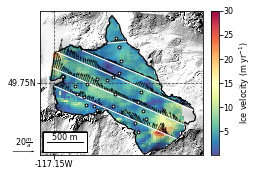

In [103]:
vf_list = ['kokanee_vy_25m_2016.tif','kokanee_vy_25m_2017.tif','kokanee_vy_25m_2018.tif']
vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/dem/3m/'
ITS = fl_path + 'ITS_Live/' + str(year) + '_conrad_ITS_LIVE.tif'

year=2018
I = np.abs(year - 2016) 

VX = vdir+ vf_list[I][:-15] + 'vx_25m_' +str(year)+ '.tif' 
VY = vdir+ vf_list[I][:-15] + 'vy_25m_' +str(year)+ '.tif' 

vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')
msk = salem.open_xr_dataset(path + 'kokanee_2015_extent_5m.tif')
msk_reproj = vy.salem.transform(msk); msk = msk_reproj.to_array(name='msk')
topo ='/home/pelto/Desktop/lidar_cbt_analysis/kokanee/20181014_Kokanee_dem1_clip_slave.tif' 
shpf = path + 'Kokanee/kokanee_2015.shp' 
with open('/home/pelto/Desktop/ice_flux/Kokanee/' + glacier[0] +'_df_agg.pkl', 'rb') as f:
    df_agg = pickle.load(f)
obs_shp = '/home/pelto/Desktop/ice_flux/flux_pts.shp' #GIS/GlacierPoints/ALL_gps_point_SB_topos.shp'
obs_pts = salem.read_shapefile(obs_shp)

vz = vy
vz.data = np.sqrt(vx.data**2 + vz.data**2 )
vz.data[vz.data<0.01]=np.nan;# vz.data[vz.data>30.0]=vz.data[vz.data>30.0]*0.5 ##remove high erroneous values
vz.data[msk.data!=1.0] = np.nan;

font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'

fig, ax = plt.subplots(1, figsize=cm2inch(8.5,5.75))
grid = mercator_grid(center_ll=(-117.137, 49.75), extent=(2250, 2000)) ##zoomed out view
sm1 = Map(grid, countries=False)
sm1.set_lonlat_contours(interval=0)
sm1.set_scale_bar(location=(0.15, 0.09),add_bbox=True,bbox_dy=1.1,linewidth=1.0)

VZA=xr.DataArray(data=vz, coords=vz.coords, dims=vz.dims, name='VZA', attrs=vz.attrs) #,indexes=vx.indexes fastpath=False)

# VZA.data=VZA.data*(msk+1.0)
sm1.set_data(VZA) 

sm1.set_cmap("Spectral_r")
sm1.set_vmax(val=30.)
#      Change the lon-lat countour setting
sm1.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
sm1.set_topography(topo,  relief_factor=0.8)
sm1.set_shapefile(shpf, lw=1.2, color='k')
sm1.set_shapefile(gates, color='w', lw=1.1)

x, y = sm1.grid.transform(obs_pts.lon.values, obs_pts.lat.values)
ax.scatter(x, y, color='k', s=8, facecolor='w',zorder=3)

sm1.append_colorbar(ax=ax, pad=0.1, label='Ice velocity (m yr$^{-1}$)')#'Ice Velocity (m yr$^{-1}$)')
sm1.plot(ax=ax)

df_agg.vx[df_agg.lon<-117.146]=df_agg.vx[df_agg.lon<-117.146]*-1.0

u = df_agg.vx.values
v = df_agg.vy.values;#v[v>25]=v[v>25]*0.2

X, Y = np.meshgrid(df_agg.lon,df_agg.lat)

# transform their coordinates to the map reference system and plot the arrows
xx, yy = sm1.grid.transform(df_agg.lon, df_agg.lat, crs=salem.wgs84)#sm1.grid.proj

# xx, yy = np.meshgrid(xx,yy)

# qu = ax.quiver(xx, yy, u, v)

###### start:stop:step
n=1
Q = ax.quiver(xx[::n], yy[::n], u[::n], v[::n], scale=150)  #, pivot='mid')
qk = ax.quiverkey(Q, 0.07, 0.10, 20, r'$20 \frac{m}{a}$', labelpos='N', coordinates='figure', labelsep=0.025)

# Q = ax.quiver(X[::1, ::1], Y[::1, ::1], u[::1, ::1], v[::1, ::1], pivot='mid')
#Q= ax2.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],pivot='mid', units='inches')

# X, Y = np.meshgrid(df_agg.lon,df_agg.lat)
# U = df_agg.vx.values
# V = df_agg.vy.values
# U,V = np.meshgrid(U, V)

# # Q = ax.quiver(X, Y, U, V)#units='width', angles='uv') 
# Q = ax.quiver(X[::30, ::30], Y[::30, ::30], U[::30, ::30], V[::30, ::30], units='xy')


fig.subplots_adjust(bottom=0.05, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_' +str(year) +'_vel_gates_quiver.pdf', dpi=300)

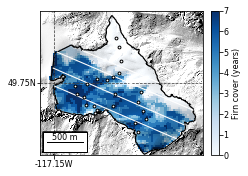

In [104]:
vf_list = ['kokanee_vy_25m_2016.tif','kokanee_vy_25m_2017.tif','kokanee_vy_25m_2018.tif']
vdir = '/home/pelto/Desktop/velocity_mapping/' +glacier[gl] + '/dem/3m/'
ITS = fl_path + 'ITS_Live/' + str(year) + '_conrad_ITS_LIVE.tif'

year=2018
I = np.abs(year - 2016) 

VX = vdir+ vf_list[I][:-15] + 'vx_25m_' +str(year)+ '.tif' 
VY = vdir+ vf_list[I][:-15] + 'vy_25m_' +str(year)+ '.tif' 

vy = salem.open_xr_dataset(VY);vy = vy.to_array(name='vy')
vx = salem.open_xr_dataset(VX);vx = vx.to_array(name='vx')
msk = salem.open_xr_dataset(path + 'kokanee_2015_extent_5m.tif')
msk_reproj = vy.salem.transform(msk); msk = msk_reproj.to_array(name='msk')
topo ='/home/pelto/Desktop/lidar_cbt_analysis/kokanee/20181014_Kokanee_dem1_clip_slave.tif' 
shpf = path + 'Kokanee/kokanee_2015.shp' 
with open('/home/pelto/Desktop/ice_flux/Kokanee/' + glacier[0] +'_df_agg.pkl', 'rb') as f:
    df_agg = pickle.load(f)
obs_shp = '/home/pelto/Desktop/ice_flux/flux_pts.shp' #GIS/GlacierPoints/ALL_gps_point_SB_topos.shp'
obs_pts = salem.read_shapefile(obs_shp)

vz = vy
vz.data = np.sqrt(vx.data**2 + vz.data**2 )
vz.data[vz.data<0.01]=np.nan;# vz.data[vz.data>30.0]=vz.data[vz.data>30.0]*0.5 ##remove high erroneous values
vz.data[msk.data!=1.0] = np.nan;

firn = '/home/pelto/Desktop/ice_flux/Kokanee/aar/AAR_2012_2018.tif'
firn =salem.open_xr_dataset(firn); firn_reproj = vx.salem.transform(firn);firn = firn_reproj.to_array(name='firn')
firn.data[msk.data!=1.0] = np.nan;

font = {'family' : 'Helvetica', 'weight' : 'normal', 'size'   : 8}
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1';pylab.rcParams['ytick.major.pad']='1'

fig, ax = plt.subplots(1, figsize=cm2inch(8.5,5.75))
grid = mercator_grid(center_ll=(-117.137, 49.75), extent=(2250, 2000)) ##zoomed out view
sm1 = Map(grid, countries=False)
sm1.set_lonlat_contours(interval=0)
sm1.set_scale_bar(location=(0.15, 0.09),add_bbox=True,bbox_dy=1.1,linewidth=1.0)

sm1.set_data(firn) 

sm1.set_cmap("Blues")
# sm1.set_vmax(val=30.)
#      Change the lon-lat countour setting
sm1.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
sm1.set_topography(topo,  relief_factor=0.8)
sm1.set_shapefile(shpf, lw=1.2, color='k')
sm1.set_shapefile(gates, color='w', lw=1.1)

x, y = sm1.grid.transform(obs_pts.lon.values, obs_pts.lat.values)
ax.scatter(x, y, color='k', s=8, facecolor='w',zorder=3)

sm1.append_colorbar(ax=ax, pad=0.1, label='Firn cover (years)')#'Ice Velocity (m yr$^{-1}$)')
sm1.plot(ax=ax)

df_agg.vx[df_agg.lon<-117.146]=df_agg.vx[df_agg.lon<-117.146]*-1.0

fig.subplots_adjust(bottom=0.05, top=0.99, left=0.14, right=0.88) #, wspace=0.22, hspace=0.15
plt.savefig(fl_path+ 'products/'+ glacier[gl]+ '_firn_map.pdf', dpi=300)

In [ ]:
obs_pts

In [150]:
####### Net flux uncertainty #################

### average ice velcoity uncertainty
vel=[sVZ/18.7,sVZ/13.3,sVZ/5.0,sVZ/8.0,sVZ/8.1]
np.mean(vel),np.min(vel),np.max(vel),

# print(np.mean(sVZ/new.v_gate_mean[1:]*100))
# print((sHopt*new.HF[1:])/new.HF[1:]*100)
n=[new16,new17,new]; sQ=[];sQF=[];sB=[] ;sQI=[];sBF=[];sBI=[]
for i in range(len(n)):
    sQ.append(np.sum(n[i].sQout)/np.sum(n[i].Q_out))
    sQF.append(np.sum(n[i].sQoutF)/np.sum(n[i].Q_outF))
    sQI.append(np.sum(n[i].sQo_gpr)/np.sum(n[i].Qo_gpr))
    
    sBF.append(np.sum(n[i].sBwe_F*n[i].dem_count)/np.sum(n[i].dem_count))
    sB.append(np.sum(n[i].sBwe_opt*n[i].dem_count)/np.sum(n[i].dem_count))
    sBI.append(np.sum(n[i].sBwe_gpr*n[i].dem_count)/np.sum(n[i].dem_count))
print(np.mean(sQ))
print(np.nanmean(sQF))
print(np.nanmean(sQI))
print(np.nanmean([sQI,sQ,sQI]).round(3))
print(np.nanmean([sBI,sB,sBF]).round(3))

0.8635271544787629
0.8515451708443548
0.8482879781754619
0.853
0.651
